
 Task 5_2: Experiment 0 running...

Experiment 0 with adam_vs_sgd_2 -- 

MSE_train: 0.007, MSE_test: 0.007
RMSE: 0.086, R2 score: 0.435


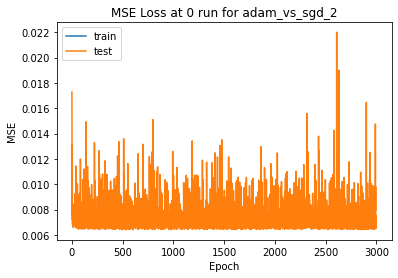

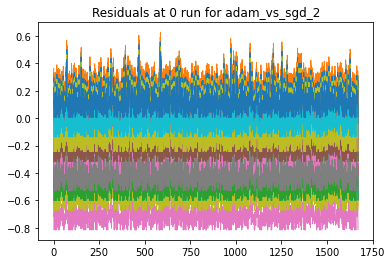


 Task 5_2: Experiment 1 running...

Experiment 1 with adam_vs_sgd_2 -- 

MSE_train: 0.006, MSE_test: 0.007
RMSE: 0.085, R2 score: 0.454


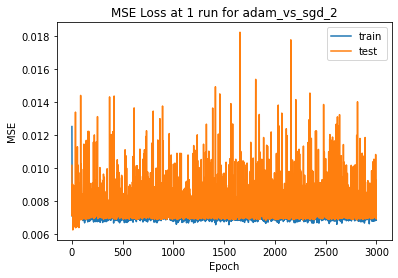

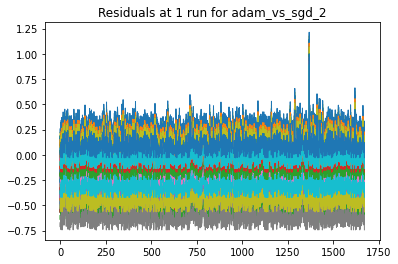


 Task 5_2: Experiment 2 running...

Experiment 2 with adam_vs_sgd_2 -- 

MSE_train: 0.006, MSE_test: 0.007
RMSE: 0.085, R2 score: 0.497


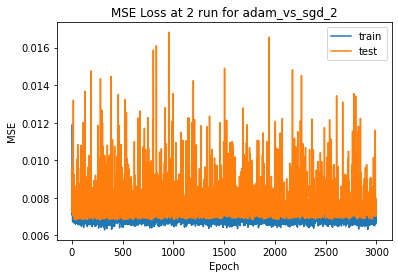

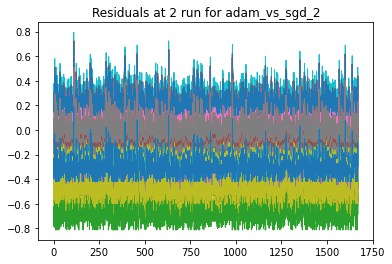


 Task 5_2: Experiment 3 running...

Experiment 3 with adam_vs_sgd_2 -- 

MSE_train: 0.014, MSE_test: 0.013
RMSE: 0.114, R2 score: -0.034


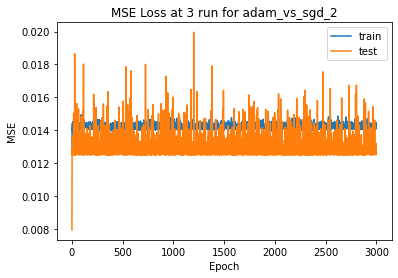

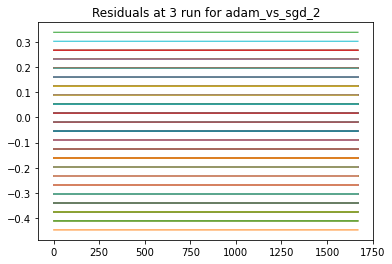


 Task 5_2: Experiment 4 running...

Experiment 4 with adam_vs_sgd_2 -- 

MSE_train: 0.009, MSE_test: 0.009
RMSE: 0.094, R2 score: 0.294


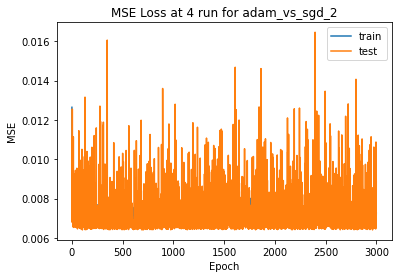

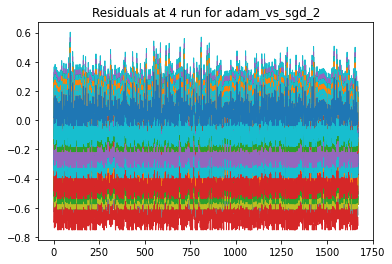


 Task 5_2: Experiment 5 running...

Experiment 5 with adam_vs_sgd_2 -- 

MSE_train: 0.006, MSE_test: 0.007
RMSE: 0.084, R2 score: 0.474


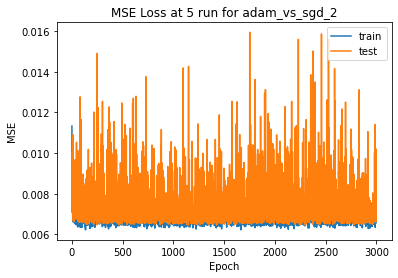

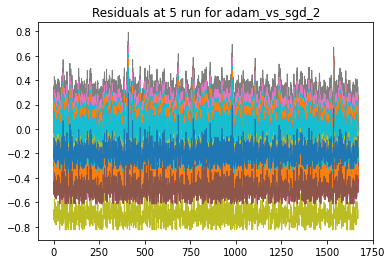


 Task 5_2: Experiment 6 running...

Experiment 6 with adam_vs_sgd_2 -- 

MSE_train: 0.007, MSE_test: 0.007
RMSE: 0.081, R2 score: 0.513


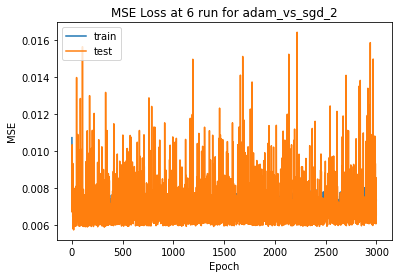

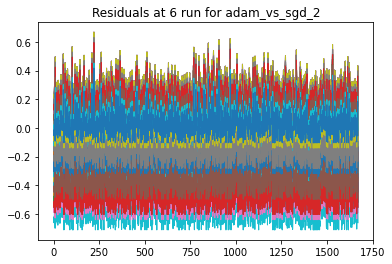


 Task 5_2: Experiment 7 running...

Experiment 7 with adam_vs_sgd_2 -- 

MSE_train: 0.008, MSE_test: 0.009
RMSE: 0.094, R2 score: 0.361


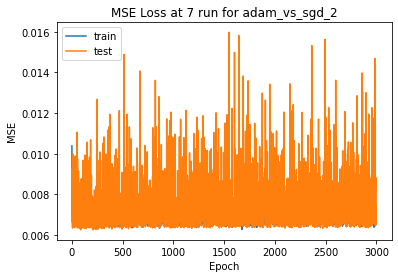

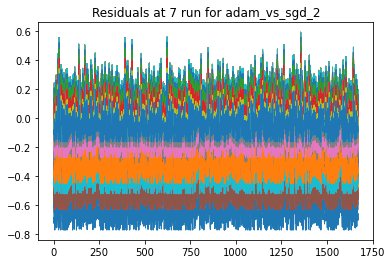


 Task 5_2: Experiment 8 running...

Experiment 8 with adam_vs_sgd_2 -- 

MSE_train: 0.006, MSE_test: 0.007
RMSE: 0.084, R2 score: 0.476


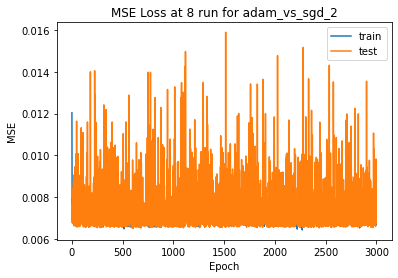

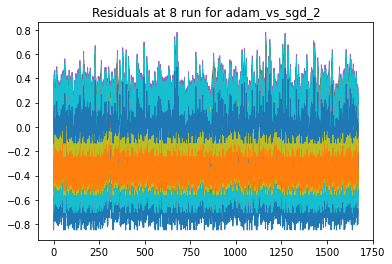


 Task 5_2: Experiment 9 running...

Experiment 9 with adam_vs_sgd_2 -- 

MSE_train: 0.006, MSE_test: 0.007
RMSE: 0.084, R2 score: 0.473


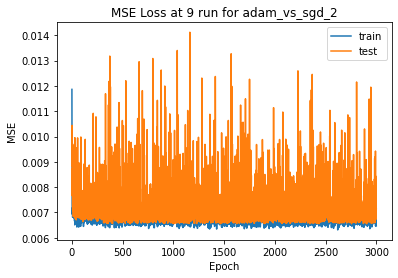

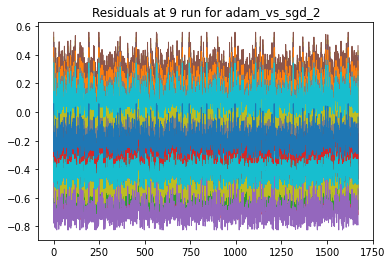

Task5_2_RMSE: 
 [0.08616638 0.08469413 0.08489319 0.11372505 0.09417758 0.08397984
 0.08109365 0.0938215  0.08396068 0.0844807 ]

 Task5_2_R2 score: 
 [ 0.43540034  0.45370785  0.49712281 -0.03438711  0.29447251  0.47430233
  0.51338816  0.36123362  0.47610846  0.47257765]

 Task5_2_ Mean RMSE:  0.08909927049966462

 Task5_2_ std of RMSE:  0.009155604559959332

 Task5_2_ Mean R-squared value:  0.3943926626453105

 Task5_2_ std of R-squared value:  0.1562129658121023


<Figure size 432x288 with 0 Axes>

In [2]:
# Data Wraggling
import numpy as np
import pandas as pd
from numpy import *
# Visualisation
import seaborn as sns
import matplotlib.pyplot as plt
# Statistics
from scipy import stats
# Scikit learn
from sklearn import datasets
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
# Keras 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import Callback
from keras.callbacks import LearningRateScheduler


def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

def load_data(data_url, normalise):
    column_names = ["sex", "length", "diameter", "height", "whole weight", 
                    "shucked weight", "viscera weight", "shell weight", "rings"]

    data = pd.read_csv(data_url, sep=',', names=column_names)
    #data.head()
    
    df_org = data.copy()
    
    '''# Create instance of labelencoder
    labelencoder = LabelEncoder()
    # Encode class values as integers then store in additional column
    data["sex_cat"] = labelencoder.fit_transform(data["sex"])
    # Rearrange the order of columns 
    data = data[["sex", "sex_cat", "length", "diameter", "height", "whole weight", 
                 "shucked weight", "viscera weight", "shell weight", "rings"]]
    #data.head()
    
    # Drop the orignal categorical feature
    abalone = data[list(data.columns.values)[1:]]
    #abalone.head()'''

    # Convert categorical feature to numerical one
    encoder = LabelEncoder()
    encoder.fit(data['sex'])
    data['sex'] = encoder.transform(data['sex'])
    
    # Convert rings to age
    data['age'] = data['rings'] + 1.5
    data = data.drop('rings', axis=1)
    #data.head()
    
    if normalise == True:
        # Normalise the input features and the response variable between 0 and 1
        dataset = normalize(data)        
    else:
        dataset = data
    #dataset.head()

    # Save normalised data as .csv file
    dataset.to_csv("data/abalone.csv", encoding='utf-8', index=False)
    
    data_X = dataset.values[:, :-1]
    data_y = dataset.values[:, -1] 

    return dataset, data_X, data_y, df_org

def countplot(df):
    sns.countplot(x='sex', data=df)
    plt.show()

def corr_plot(df):
    # Develop a correlation map using a heatmap
    corr_matrix = df.corr().round(2)
    plt.figure(figsize=(10,10))
    ax = sns.heatmap(corr_matrix, vmin=-1, center=0, annot=True, cmap='BrBG')
    plt.savefig('figure/corr_mat.png')
    plt.show()
    plt.clf()

def boxenplot(df):
    # Categorical features
    temp = pd.concat([df['rings'], df['sex']], axis=1)
    f, ax = plt.subplots(figsize=(8, 6))
    fig = sns.boxenplot(x='sex', y="rings", data=df)
    fig.axis(ymin=0, ymax=30)
    plt.savefig('figure/boxen.png')
    plt.show()
    plt.clf()    

def hist_plot(df):
    # Create histograms of all features
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16,10))
    df.plot(kind='hist', subplots=True, ax=axes, alpha=0.5, bins=30)
    plt.savefig('figure/hist.png')
    plt.show()
    plt.clf()
    
def pairgrid(df):
    g = sns.PairGrid(df, diag_sharey=False, corner=True)
    g.map_lower(sns.scatterplot)
    g.map_diag(sns.kdeplot)
    plt.savefig('figure/pairgrid.png')
    plt.show()
    plt.clf()

    
def split_data(data_X, data_y, split_ratio, run_num):
    # Splitting the dataset into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=split_ratio, random_state=run_num)
    return X_train, X_test, y_train, y_test

def keras_nn(X_train, X_test, y_train, y_test, hidden, model_type, learn_rate):
    '''Neural network using keras.
    :param hidden: Number of neurons in the hidden layer.
    :param model_type: Optimizer options: 
        0 -single hidden layer using SGD, 1 -single hidden layer using Adam, 2 -two hidden layers using SGD
        3 -single hidden layer using Adam, 4 -two hidden layers using Adam.
    :param learn_rate: Tuning parameter in an optimization algorithm.
    :returns:
        mse_train, mse_test, rmse, r2, residuals, history.
    '''    
    if model_type == 0:   # Task 2: effect of number of hidden neurons -single hidden layer using Adam
        # Create the Sequential model
        model = Sequential([
            keras.layers.Dense(hidden, input_dim=X_train.shape[1], activation="relu", kernel_initializer='normal'),
            keras.layers.Dense(1, kernel_initializer='normal')
        ])
        # Specify the loss function and the optimizer after a model is created
        model.compile(loss="mse", optimizer='adam', metrics=['mse'])
            
    elif model_type == 1:   # Task 3: effect of learning rate -single hidden layer using SGD
        # Create the Sequential model
        model = Sequential([
            keras.layers.Dense(hidden, input_dim=X_train.shape[1], activation="relu", kernel_initializer='normal'),
            keras.layers.Dense(1, kernel_initializer='normal')
        ])
        # Specify the loss function and the optimizer after a model is created
        sgd = SGD(learning_rate=learn_rate)
        model.compile(loss="mse", optimizer=sgd, metrics=['mse'])
        
    elif model_type == 2:   # Task 4: two hidden layers using SGD
        # Create the Sequential model
        model = Sequential([
            keras.layers.Dense(hidden, input_dim=X_train.shape[1], activation="relu", kernel_initializer='normal'),
            keras.layers.Dense(hidden, activation="relu", kernel_initializer='normal'),
            keras.layers.Dense(1, kernel_initializer='normal')
        ])
        # Specify the loss function and the optimizer after a model is created
        sgd = SGD(learning_rate=learn_rate)
        model.compile(loss="mse", optimizer=sgd, metrics=['mse'])
        
    elif model_type == 3:   # Task 5: Adam vs. SGD -single hidden layer using Adam
        # Create the Sequential model
        model = Sequential([
            keras.layers.Dense(hidden, input_dim=X_train.shape[1], activation="relu", kernel_initializer='normal'),
            keras.layers.Dense(1, kernel_initializer='normal')
        ])
        # Specify the loss function and the optimizer after a model is created 
        adam = Adam(learning_rate=learn_rate)
        model.compile(loss="mse", optimizer=adam, metrics=['mse'])
        
    elif model_type == 4:   # Task 5: Adam vs. SGD -two hidden layers using Adam
        # Create the Sequential model
        model = Sequential([
            keras.layers.Dense(hidden, input_dim=X_train.shape[1], activation="relu", kernel_initializer='normal'),
            keras.layers.Dense(hidden, activation="relu", kernel_initializer='normal'),
            keras.layers.Dense(1, kernel_initializer='normal')
        ])
        # Specify the loss function and the optimizer after a model is created 
        adam = Adam(learning_rate=learn_rate)
        model.compile(loss="mse", optimizer=adam, metrics=['mse'])
            
    else:
        print('no model')
        
    # Fit model
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3000, batch_size=10, verbose=0)
    #history = model.fit(X_train, y_train, validation_split=0.25, epochs=3000, batch_size=10, verbose=0)

    # Evaluate the model
    # https://keras.io/api/models/model_training_apis/
    loss_train, mse_train = model.evaluate(X_train, y_train, verbose=0)
    loss_test, mse_test = model.evaluate(X_test, y_test, verbose=0)
    
    # Predit
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    residuals = y_pred - y_test
    confidence = 0.95
    squared_errors = residuals ** 2
    ci = np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1, 
                                  loc=squared_errors.mean(), 
                                  scale=stats.sem(squared_errors)))
    
    return mse_train, mse_test, rmse, r2, residuals, ci, history

def result_present(mse_train, mse_test, rmse, r2, residuals, ci, history, task, run_num, fname):
    
    print('Experiment {} with {} -- \n'.format(run_num, fname))    
    print('MSE_train: %.3f, MSE_test: %.3f' % (mse_train, mse_test))
    print('RMSE: %.3f, R2 score: %.3f' % (rmse, r2))
    print('CI: %.3' % ci)
    
    # plot metrics
    plt.title('MSE Loss at {} run for {}'.format(run_num, fname))
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.legend()
    plt.savefig('figure/{}/Loss_{}_run_{}.png'.format(task, run_num, fname))
    plt.show()
    plt.clf()
    
    #---------------------------------------
    '''plt.title('MSE at {} run for {}'.format(run_num, fname))
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.plot(history.history['mse'], label='train')
    plt.plot(history.history['val_mse'], label='test')
    plt.savefig('figure/{}/MSE_{}_run_{}.png'.format(task, run_num, fname))
    plt.legend()
    plt.show()'''
    
    # plot residuals    
    plt.title('Residuals at {} run for {}'.format(run_num, fname))
    plt.plot(residuals, linewidth=1)
    plt.savefig('figure/{}/res_{}_run_{}.png'.format(task, run_num, fname))
    plt.show()
    plt.clf()
    

def main():
    
    normalise = True
    
    data_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data'
    dataset, data_X, data_y, df_org = load_data(data_url, normalise)
    
    countplot(df_org)
    boxenplot(df_org)
    corr_plot(dataset)    
    hist_plot(dataset)
    pairgrid(dataset)
       
    max_expruns = 10
    split_ratio = 0.4
    
    # Task 2: Investigate the effect of the number of hidden neurons (e.g. 5, 10, 15, 20) for a single hidden layer
    task = 'task2'
    
    hidden_lst = [5, 10, 15, 20]
    num_hidden = len(hidden_lst)
    col_names = ['5-neuron', '10-neuron', '15-neuron', '20-neuron']
    rmse_mx = np.zeros((max_expruns, num_hidden))
    r2_mx = np.zeros((max_expruns, num_hidden))
    learn_rate = 0.03
    model_type = 0  # using optimizer Adam to compare effect of number of hidden neurons
        
    for run_num in range(max_expruns):
        print("\n Task 2: Experiment {} running...\n".format(run_num))
        
        X_train, X_test, y_train, y_test = split_data(data_X, data_y, split_ratio, run_num)
        
        for hidden in hidden_lst:
            hidden_idx = hidden_lst.index(hidden)
            
            mse_train, mse_test, rmse, r2, residuals, history = keras_nn(X_train, X_test, y_train, y_test, hidden, model_type, learn_rate)
            
            fname = str(hidden) + '-neuron' 
            result_present(mse_train, mse_test, rmse, r2, residuals, history, task, run_num, fname)
            
            rmse_mx[run_num, hidden_idx] = rmse
            r2_mx[run_num, hidden_idx] = r2

    rmse_df = pd.DataFrame(rmse_mx, columns=col_names)
    rmse_df.to_csv("data/task2_rmse.csv", encoding='utf-8', index=False)
    print("Task2_RMSE: \n", rmse_df)
    #display(rmse_df)

    r2_df = pd.DataFrame(r2_mx, columns=col_names)
    r2_df.to_csv("data/task2_r2.csv", encoding='utf-8', index=False)
    print("\n Task2_R2 score: \n", r2_df)
    #display(r2_df)

    rmse_mean = np.zeros(num_hidden)
    rmse_std = np.zeros(num_hidden)

    r2_mean = np.zeros(num_hidden)
    r2_std = np.zeros(num_hidden)

    rmse_mean = rmse_mx.mean(axis=0)
    rmse_std = rmse_mx.std(axis=0)

    r2_mean = r2_mx.mean(axis=0)
    r2_std = r2_mx.std(axis=0)

    np.savetxt('data/task2_results.txt', (rmse_mean, rmse_std, r2_mean, r2_std), fmt='%1.5f')

    print("\n Task2_Mean RMSE: ", rmse_mean)
    print("\n Task2_std of RMSE: ", rmse_std)
    print("\n Task2_Mean R-squared value: ", r2_mean)
    print("\n Task2_std of R-squared value: ", r2_std)
    
    
    # Task 3: Investigate the effect of learning rate (in case of SGD) for the selected data set (using the optimal number of hidden neurons).
    task = 'task3'

    lr_lst = list(np.arange(0.01, 0.1, 0.02))
    num_lr = len(lr_lst)
    col_names = ['lr=0.01', 'lr=0.03', 'lr=0.05', 'lr=0.07', 'lr=0.09']
    rmse_mx = np.zeros((max_expruns, num_lr))
    r2_mx = np.zeros((max_expruns, num_lr))
    model_type = 1   # using optimizer SGD to compare effect of learning rate
    hidden = 10   # based on result of Task 2, 10 hidden neurons outperformed
        
    for run_num in range(max_expruns):
        print("\n Task 3: Experiment {} running...\n".format(run_num))
        
        X_train, X_test, y_train, y_test = split_data(data_X, data_y, split_ratio, run_num)
        
        for learn_rate in lr_lst:
            lr_idx = lr_lst.index(learn_rate)
            
            mse_train, mse_test, rmse, r2, residuals, history = keras_nn(X_train, X_test, y_train, y_test, hidden, model_type, learn_rate)
            
            fname = 'learn_rate_' + str(learn_rate.round(2))
            result_present(mse_train, mse_test, rmse, r2, residuals, history, task, run_num, fname)
            
            rmse_mx[run_num, lr_idx] = rmse
            r2_mx[run_num, lr_idx] = r2       

    rmse_df = pd.DataFrame(rmse_mx, columns=col_names)
    rmse_df.to_csv("data/task3_rmse.csv", encoding='utf-8', index=False)
    print("Task3_RMSE: \n", rmse_df)
    #display(rmse_df)

    r2_df = pd.DataFrame(r2_mx, columns=col_names)
    r2_df.to_csv("data/task3_r2.csv", encoding='utf-8', index=False)
    print("\n Task3_R2 score: \n", r2_df)
    #display(r2_df)

    rmse_mean = np.zeros(num_lr)
    rmse_std = np.zeros(num_lr)

    r2_mean = np.zeros(num_lr)
    r2_std = np.zeros(num_lr)

    rmse_mean = rmse_mx.mean(axis=0)
    rmse_std = rmse_mx.std(axis=0)

    r2_mean = r2_mx.mean(axis=0)
    r2_std = r2_mx.std(axis=0)

    np.savetxt('data/task3_results.txt', (rmse_mean, rmse_std, r2_mean, r2_std), fmt='%1.5f')

    print("\n Task3_Mean RMSE: ", rmse_mean)
    print("\n Task3_std of RMSE: ", rmse_std)
    print("\n Task3_Mean R-squared value: ", r2_mean)
    print("\n Task3_std of R-squared value: ", r2_std)
    

    # Task 4: Investigate the effect on a different number of hidden layers (1, 2) with the optimal number of hidden neurons (from Part 4).
    task = 'task4'

    rmse_ar = np.zeros(max_expruns)
    r2_ar = np.zeros(max_expruns)
    model_type = 2      # two hidden layers using SGD
    learn_rate = 0.03   # based on result of Task 3, learning rate 0.03 outperformed
    hidden = 10         # based on result of Task 2, 10 hidden neurons outperformed
        
    for run_num in range(max_expruns):
        print("\n Task 4 lr at 0.01: Experiment {} running...\n".format(run_num))
        
        X_train, X_test, y_train, y_test = split_data(data_X, data_y, split_ratio, run_num)
        
        mse_train, mse_test, rmse, r2, residuals, history = keras_nn(X_train, X_test, y_train, y_test, hidden, model_type, learn_rate)
            
        fname = '2-hidden-layer'
        result_present(mse_train, mse_test, rmse, r2, residuals, history, task, run_num, fname)
            
        rmse_ar[run_num] = rmse
        r2_ar[run_num] = r2       

    print("Task4_RMSE: \n", rmse_ar)
    print("\n Task4_R2 score: \n", r2_ar)

    rmse_mean = np.mean(rmse_ar)
    rmse_std = np.std(rmse_ar)

    r2_mean = np.mean(r2_ar)
    r2_std = np.std(r2_ar)

    np.savetxt('data/task4_1_results.txt', (rmse_mean, rmse_std, r2_mean, r2_std), fmt='%1.5f')

    print("\n Task4_Mean RMSE: ", rmse_mean)
    print("\n Task4_std of RMSE: ", rmse_std)
    print("\n Task4_Mean R-squared value: ", r2_mean)
    print("\n Task4_std of R-squared value: ", r2_std)
    
    
    # Task 5_1: Investigate the effect of Adam and SGD on training and test performance using single hidden layer.
    ''task = 'task5_1'
    
    rmse_ar = np.zeros(max_expruns)
    r2_ar = np.zeros(max_expruns)
    model_type = 3      # single hidden layer using Adam to compare to SGD done in task 3 
    learn_rate = 0.03   # based on result of Task 3, learning rate 0.03 outperformed    
    hidden = 10         # based on result of Task 2, 10 hidden neurons outperformed
        
    for run_num in range(max_expruns):
        print("\n Task 5_1: Experiment {} running...\n".format(run_num))
        
        X_train, X_test, y_train, y_test = split_data(data_X, data_y, split_ratio, run_num)
        
        mse_train, mse_test, rmse, r2, residuals, history = keras_nn(X_train, X_test, y_train, y_test, hidden, model_type, learn_rate)
            
        fname = 'adam_vs_sgd_1'
        result_present(mse_train, mse_test, rmse, r2, residuals, history, task, run_num, fname)
            
        rmse_ar[run_num] = rmse
        r2_ar[run_num] = r2       

    print("Task5_1_RMSE: \n", rmse_ar)    
    print("\n Task5_1_R2 score: \n", r2_ar)

    rmse_mean = np.mean(rmse_ar)
    rmse_std = np.std(rmse_ar)

    r2_mean = np.mean(r2_ar)
    r2_std = np.std(r2_ar)

    np.savetxt('data/task5_1_results.txt', (rmse_mean, rmse_std, r2_mean, r2_std), fmt='%1.5f')

    print("\n Task5_1_Mean RMSE: ", rmse_mean)
    print("\n Task5_1_std of RMSE: ", rmse_std)
    print("\n Task5_1_Mean R-squared value: ", r2_mean)
    print("\n Task5_1_std of R-squared value: ", r2_std)
    
    
    # Task 5_2: Investigate the effect of Adam and SGD on training and test performance using two hidden layers.
    task = 'task5_2'
    
    rmse_ar = np.zeros(max_expruns)
    r2_ar = np.zeros(max_expruns)
    model_type = 4      # single hidden layer using Adam to compare to SGD done in task 3 
    learn_rate = 0.03   # based on result of Task 3, learning rate 0.03 outperformed    
    hidden = 10         # based on result of Task 2, 10 hidden neurons outperformed
        
    for run_num in range(max_expruns):
        print("\n Task 5_2: Experiment {} running...\n".format(run_num))
        
        X_train, X_test, y_train, y_test = split_data(data_X, data_y, split_ratio, run_num)
        
        mse_train, mse_test, rmse, r2, residuals, history = keras_nn(X_train, X_test, y_train, y_test, hidden, model_type, learn_rate)
            
        fname = 'adam_vs_sgd_2'
        result_present(mse_train, mse_test, rmse, r2, residuals, history, task, run_num, fname)
            
        rmse_ar[run_num] = rmse
        r2_ar[run_num] = r2       

    print("Task5_2_RMSE: \n", rmse_ar)    
    print("\n Task5_2_R2 score: \n", r2_ar)

    rmse_mean = np.mean(rmse_ar)
    rmse_std = np.std(rmse_ar)

    r2_mean = np.mean(r2_ar)
    r2_std = np.std(r2_ar)

    np.savetxt('data/task5_2_results.txt', (rmse_mean, rmse_std, r2_mean, r2_std), fmt='%1.5f')

    print("\n Task5_2_ Mean RMSE: ", rmse_mean)
    print("\n Task5_2_ std of RMSE: ", rmse_std)
    print("\n Task5_2_ Mean R-squared value: ", r2_mean)
    print("\n Task5_2_ std of R-squared value: ", r2_std)
    
    
if __name__ == '__main__':
    main()

In [189]:
print(history.history.keys())

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


In [ ]:
def keras_nn(X_train, X_test, y_train, y_test, hidden, model_type, learn_rate):
    '''Neural network.
    :param hidden: Number of neurons in the hidden layer.
    :param model_type: Optimizer options.        
    :param learn_rate: Tuning parameter in an optimization algorithm.
    :param run_num: Experiment number.
    :returns:
        mse_train, mse_test, rmse, r2, residuals, history.
    '''    
    if model_type == 0:   # single hidden layer with SGD
        # Create the Sequential model
        model = Sequential([
            keras.layers.Dense(hidden, input_dim=X_train.shape[1], activation="relu", kernel_initializer='normal'),
            keras.layers.Dense(1, kernel_initializer='normal')
        ])
        # Specify the loss function and the optimizer after a model is created
        sgd = SGD(learning_rate=learn_rate, decay=1e-6, momentum=0.9, nesterov=True)
        model.compile(loss="mse", optimizer=sgd, metrics=['mse'])
            
    elif model_type == 1:   # single hidden layer with Adam
        # Create the Sequential model
        model = Sequential([
            keras.layers.Dense(hidden, input_dim=X_train.shape[1], activation="relu", kernel_initializer='normal'),
            keras.layers.Dense(1, kernel_initializer='normal')
        ])
        # Specify the loss function and the optimizer after a model is created
        adam = Adam(learning_rate=learn_rate, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
        model.compile(loss="mse", optimizer=adam, metrics=['mse'])
        
    elif model_type == 2:   # two hidden layers with SGD
        # Create the Sequential model
        model = Sequential([
            keras.layers.Dense(hidden, input_dim=X_train.shape[1], activation="relu", kernel_initializer='normal'),
            keras.layers.Dense(hidden, activation="relu", kernel_initializer='normal'),
            keras.layers.Dense(1, kernel_initializer='normal')
        ])
        # Specify the loss function and the optimizer after a model is created
        sgd = SGD(learning_rate=learn_rate, decay=1e-6, momentum=0.9, nesterov=True)
        model.compile(loss="mse", optimizer=sgd, metrics=['mse'])
            
    else:
        print('no model')
        
    # Fit model
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3000, batch_size=10, verbose=0)
    #history = model.fit(X_train, y_train, validation_split=0.25, epochs=3000, batch_size=10, verbose=0)

    # Evaluate the model
    # https://keras.io/api/models/model_training_apis/
    loss_train, mse_train = model.evaluate(X_train, y_train, verbose=0)
    loss_test, mse_test = model.evaluate(X_test, y_test, verbose=0)
    
    # Predit
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    residuals = y_pred - y_test
    
    return mse_train, mse_test, rmse, r2, residuals, history

In [ ]:
def result_present(mse_train, mse_test, rmse, r2, residuals, history, task, run_num, fname):
    
    print('Experiment {} with {} -- \n'.format(run_num, fname))    
    print('MSE_train: %.3f, MSE_test: %.3f' % (mse_train, mse_test))
    print('RMSE: %.3f, R2 score: %.3f' % (rmse, r2))
    
    # plot metrics
    plt.title('Loss at {} run for {}'.format(run_num, fname))
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.legend()
    plt.savefig('figure/{}/Loss_{}_run_{}.png'.format(task, run_num, fname))
    plt.show()
    plt.clf()
    
    plt.title('MSE at {} run for {}'.format(run_num, fname))
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.plot(history.history['mse'], label='train')
    plt.plot(history.history['val_mse'], label='test')
    plt.savefig('figure/{}/MSE_{}_run_{}.png'.format(task, run_num, fname))
    plt.legend()
    plt.show()
    
    # plot residuals    
    plt.title('Residuals at {} run for {}'.format(run_num, fname))
    plt.plot(residuals, linewidth=1)
    plt.savefig('figure/{}/res_{}_run_{}.png'.format(task, run_num, fname))
    plt.show()
    plt.clf()

Task 3: Experiment 0 running...

With learn_rate 0.01 -- MSE_train: 0.005, MSE_test: 0.006


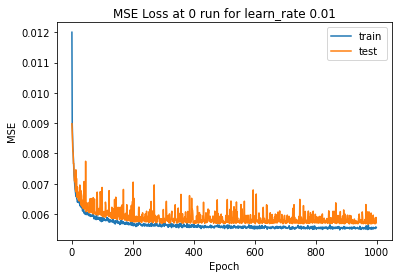

With learn_rate 0.01 -- RMSE: 0.076, R2 score: 0.566


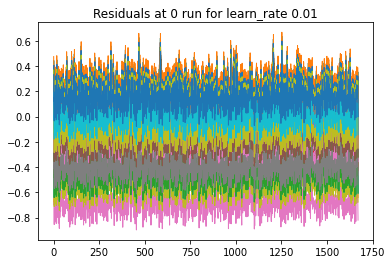

With learn_rate 0.03 -- MSE_train: 0.006, MSE_test: 0.006


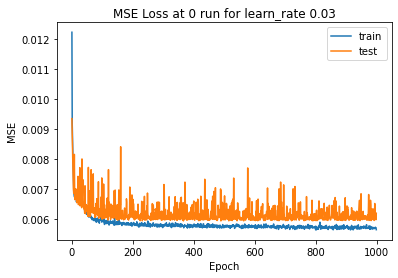

With learn_rate 0.03 -- RMSE: 0.079, R2 score: 0.529


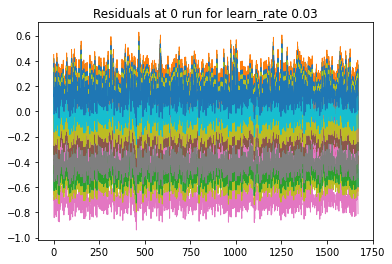

With learn_rate 0.05 -- MSE_train: 0.005, MSE_test: 0.006


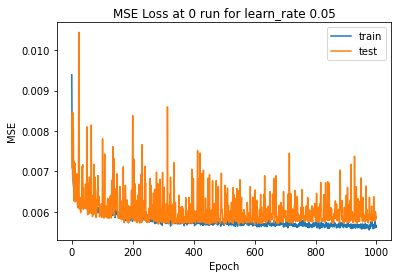

With learn_rate 0.05 -- RMSE: 0.077, R2 score: 0.553


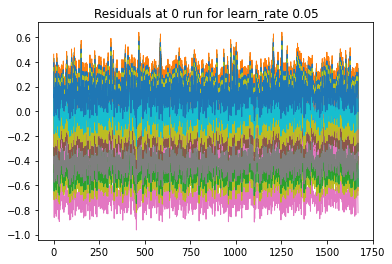

With learn_rate 0.07 -- MSE_train: 0.006, MSE_test: 0.006


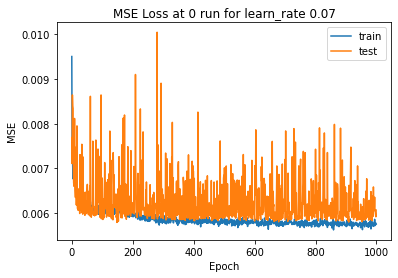

With learn_rate 0.07 -- RMSE: 0.078, R2 score: 0.539


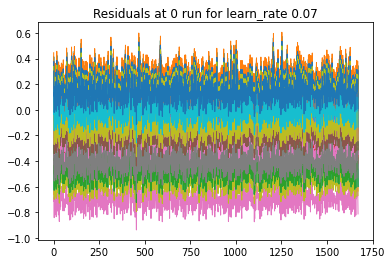

With learn_rate 0.09 -- MSE_train: 0.006, MSE_test: 0.006


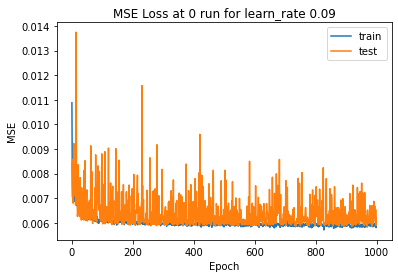

With learn_rate 0.09 -- RMSE: 0.079, R2 score: 0.529


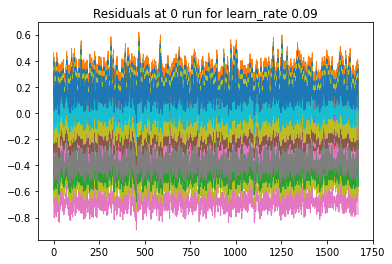

Task 3: Experiment 1 running...

With learn_rate 0.01 -- MSE_train: 0.006, MSE_test: 0.006


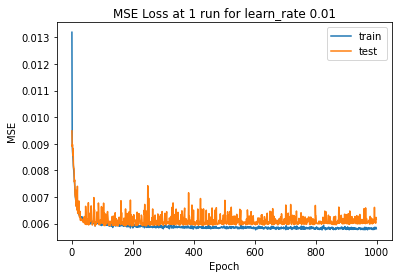

With learn_rate 0.01 -- RMSE: 0.079, R2 score: 0.530


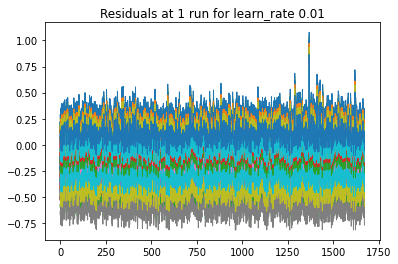

With learn_rate 0.03 -- MSE_train: 0.006, MSE_test: 0.006


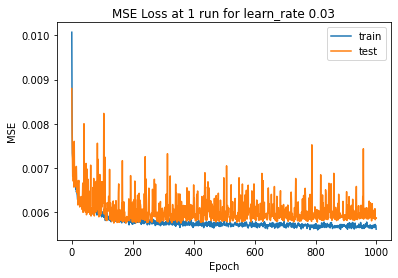

With learn_rate 0.03 -- RMSE: 0.077, R2 score: 0.553


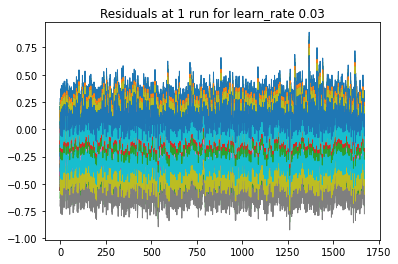

With learn_rate 0.05 -- MSE_train: 0.007, MSE_test: 0.008


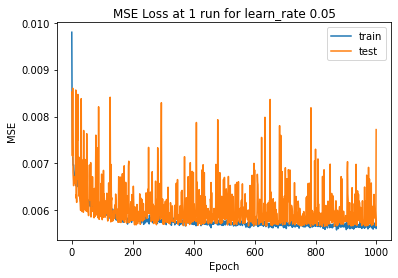

With learn_rate 0.05 -- RMSE: 0.088, R2 score: 0.412


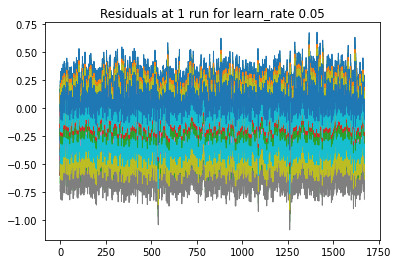

With learn_rate 0.07 -- MSE_train: 0.006, MSE_test: 0.006


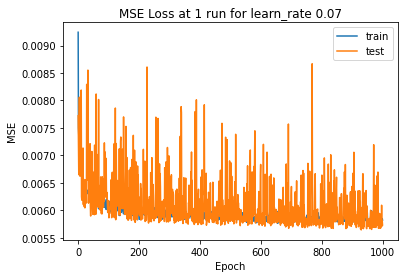

With learn_rate 0.07 -- RMSE: 0.076, R2 score: 0.563


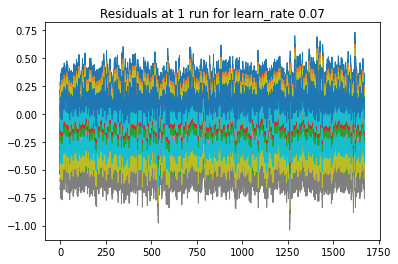

With learn_rate 0.09 -- MSE_train: 0.008, MSE_test: 0.008


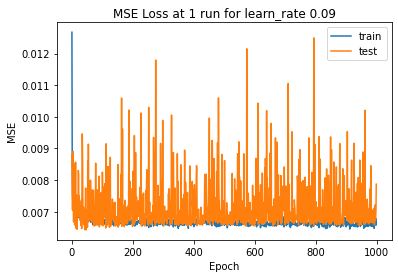

With learn_rate 0.09 -- RMSE: 0.089, R2 score: 0.401


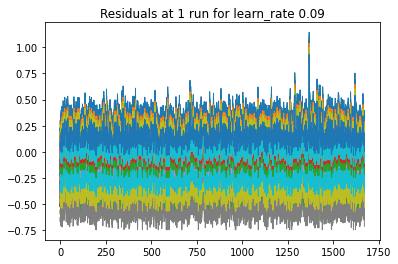

Task 3: Experiment 2 running...

With learn_rate 0.01 -- MSE_train: 0.005, MSE_test: 0.006


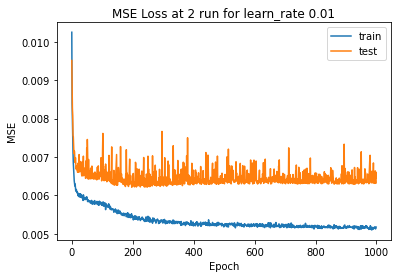

With learn_rate 0.01 -- RMSE: 0.080, R2 score: 0.559


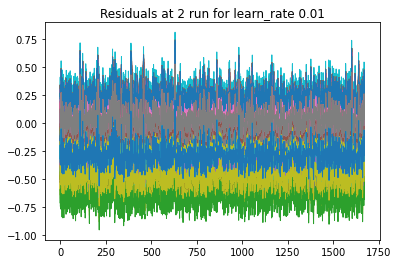

With learn_rate 0.03 -- MSE_train: 0.007, MSE_test: 0.007


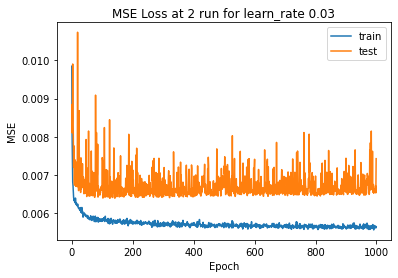

With learn_rate 0.03 -- RMSE: 0.086, R2 score: 0.482


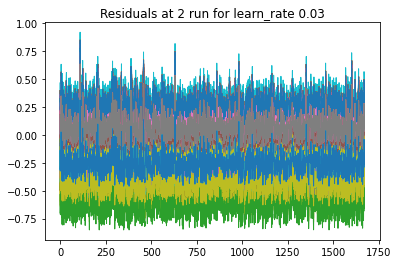

With learn_rate 0.05 -- MSE_train: 0.005, MSE_test: 0.007


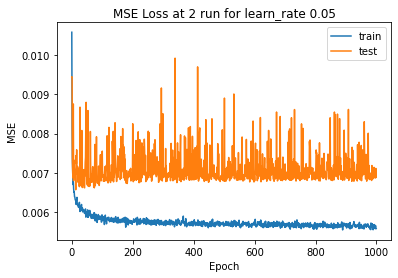

With learn_rate 0.05 -- RMSE: 0.083, R2 score: 0.519


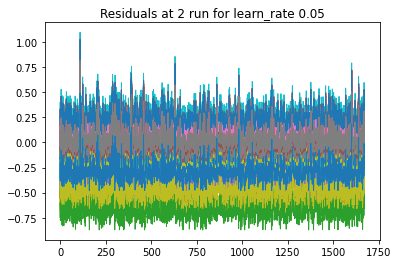

With learn_rate 0.07 -- MSE_train: 0.005, MSE_test: 0.007


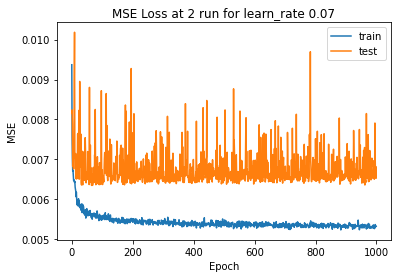

With learn_rate 0.07 -- RMSE: 0.081, R2 score: 0.544


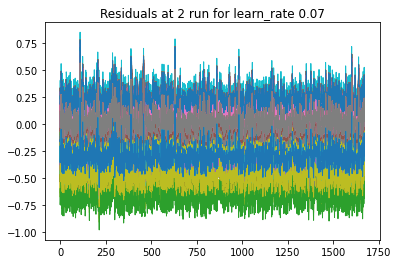

With learn_rate 0.09 -- MSE_train: 0.006, MSE_test: 0.007


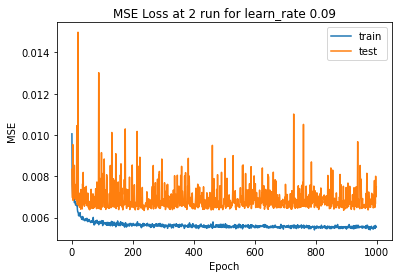

With learn_rate 0.09 -- RMSE: 0.087, R2 score: 0.478


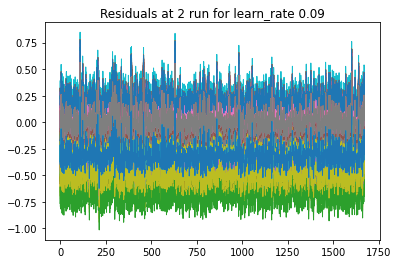

Task 3: Experiment 3 running...

With learn_rate 0.01 -- MSE_train: 0.006, MSE_test: 0.006


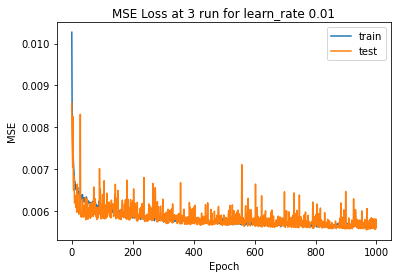

With learn_rate 0.01 -- RMSE: 0.075, R2 score: 0.553


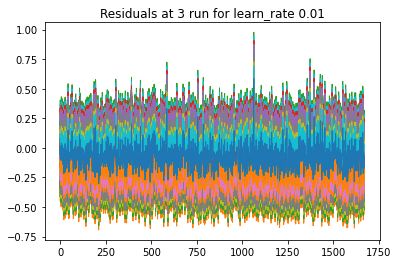

With learn_rate 0.03 -- MSE_train: 0.006, MSE_test: 0.006


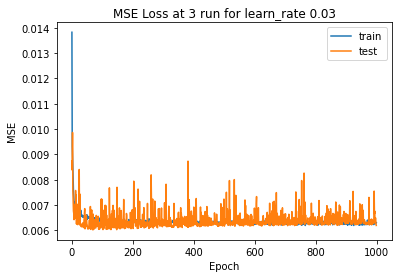

With learn_rate 0.03 -- RMSE: 0.079, R2 score: 0.505


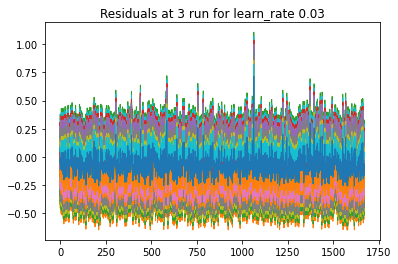

With learn_rate 0.05 -- MSE_train: 0.007, MSE_test: 0.007


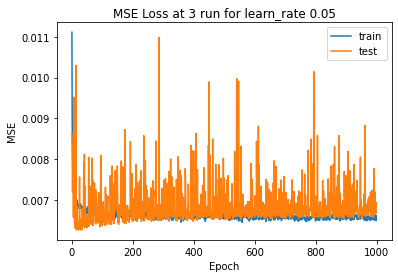

With learn_rate 0.05 -- RMSE: 0.083, R2 score: 0.446


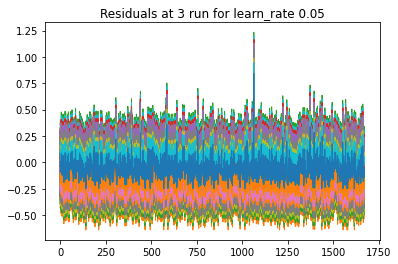

With learn_rate 0.07 -- MSE_train: 0.006, MSE_test: 0.007


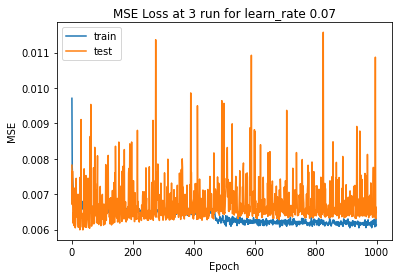

With learn_rate 0.07 -- RMSE: 0.081, R2 score: 0.480


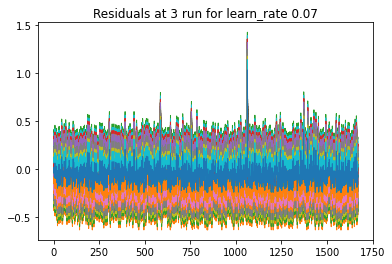

With learn_rate 0.09 -- MSE_train: 0.006, MSE_test: 0.006


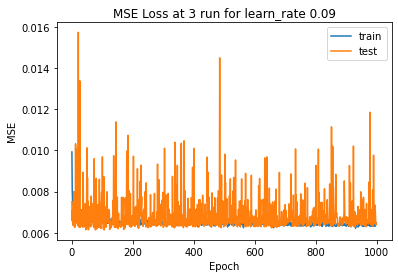

With learn_rate 0.09 -- RMSE: 0.080, R2 score: 0.484


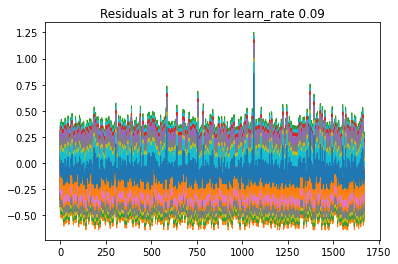

Task 3: Experiment 4 running...

With learn_rate 0.01 -- MSE_train: 0.006, MSE_test: 0.006


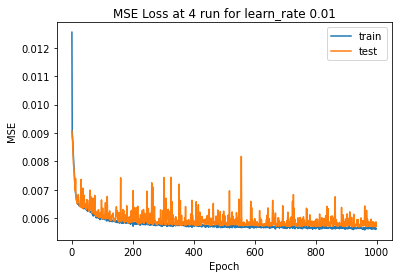

With learn_rate 0.01 -- RMSE: 0.076, R2 score: 0.544


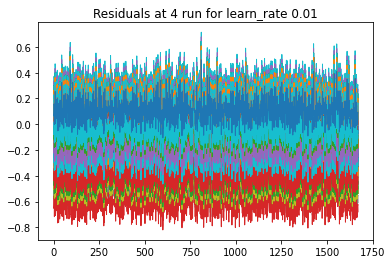

With learn_rate 0.03 -- MSE_train: 0.005, MSE_test: 0.006


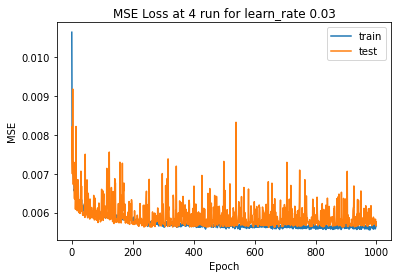

With learn_rate 0.03 -- RMSE: 0.076, R2 score: 0.542


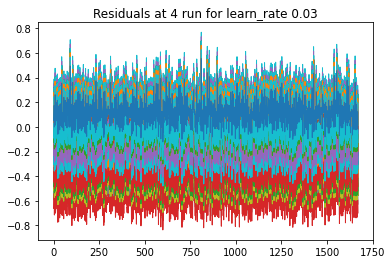

With learn_rate 0.05 -- MSE_train: 0.005, MSE_test: 0.006


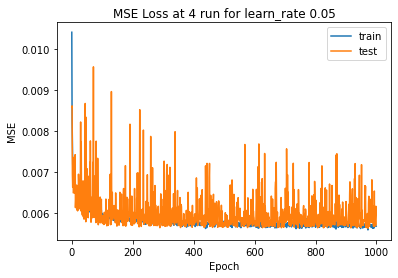

With learn_rate 0.05 -- RMSE: 0.076, R2 score: 0.546


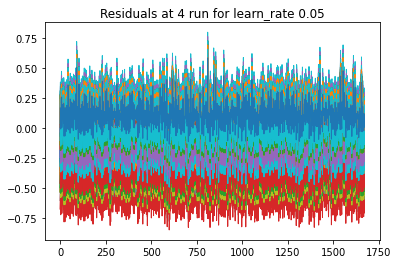

With learn_rate 0.07 -- MSE_train: 0.006, MSE_test: 0.006


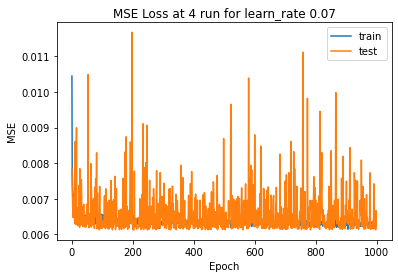

With learn_rate 0.07 -- RMSE: 0.079, R2 score: 0.505


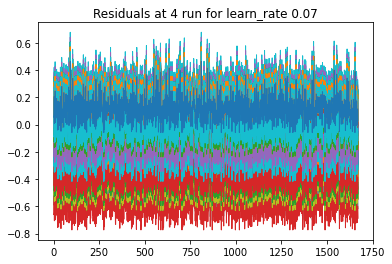

With learn_rate 0.09 -- MSE_train: 0.006, MSE_test: 0.006


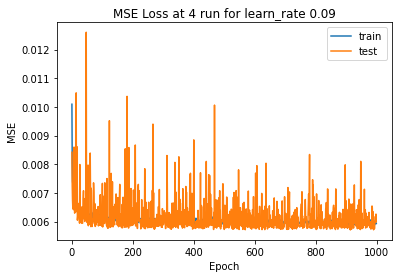

With learn_rate 0.09 -- RMSE: 0.078, R2 score: 0.522


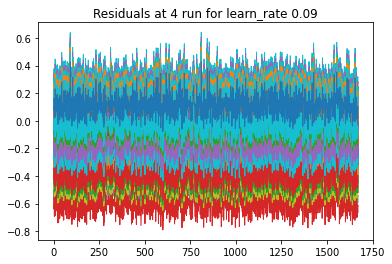

Task 3: Experiment 5 running...

With learn_rate 0.01 -- MSE_train: 0.006, MSE_test: 0.006


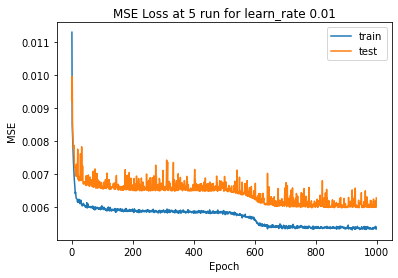

With learn_rate 0.01 -- RMSE: 0.079, R2 score: 0.532


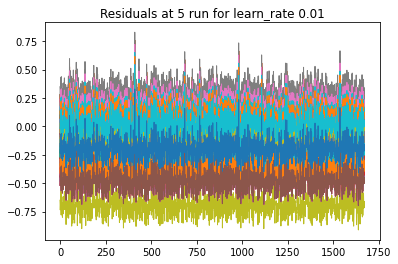

With learn_rate 0.03 -- MSE_train: 0.005, MSE_test: 0.006


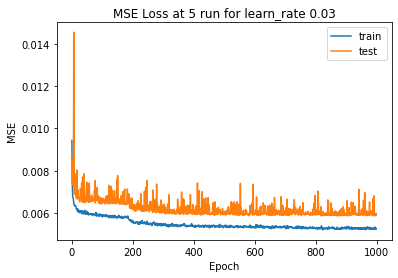

With learn_rate 0.03 -- RMSE: 0.077, R2 score: 0.555


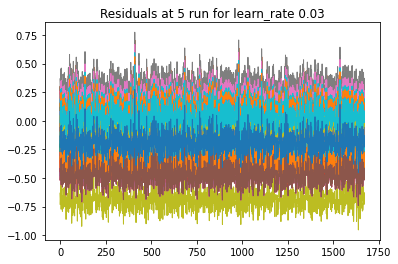

With learn_rate 0.05 -- MSE_train: 0.006, MSE_test: 0.007


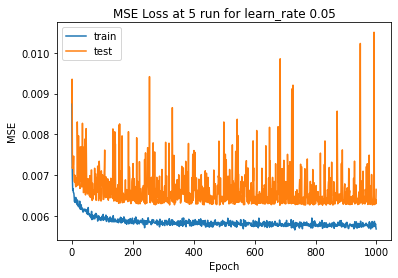

With learn_rate 0.05 -- RMSE: 0.082, R2 score: 0.504


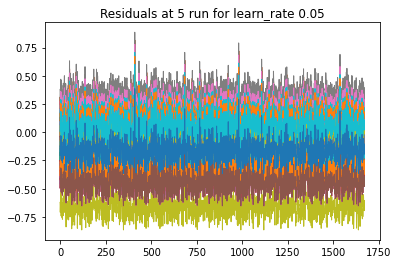

With learn_rate 0.07 -- MSE_train: 0.005, MSE_test: 0.006


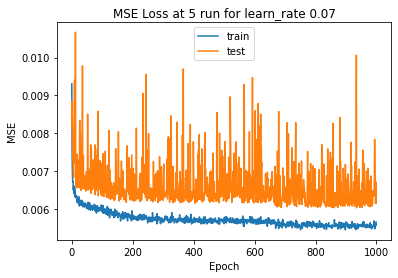

With learn_rate 0.07 -- RMSE: 0.078, R2 score: 0.542


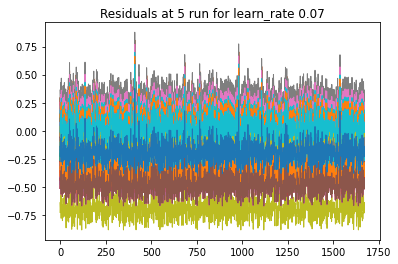

With learn_rate 0.09 -- MSE_train: 0.006, MSE_test: 0.006


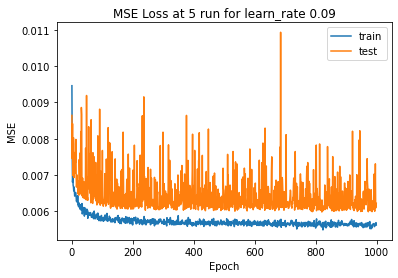

With learn_rate 0.09 -- RMSE: 0.079, R2 score: 0.536


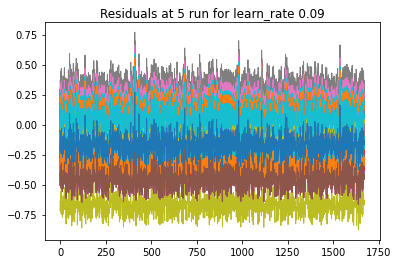

Task 3: Experiment 6 running...

With learn_rate 0.01 -- MSE_train: 0.006, MSE_test: 0.006


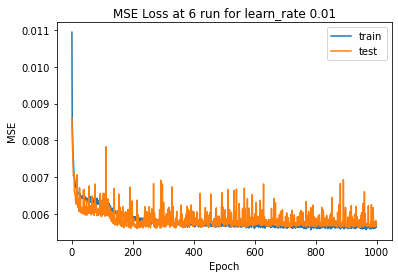

With learn_rate 0.01 -- RMSE: 0.075, R2 score: 0.579


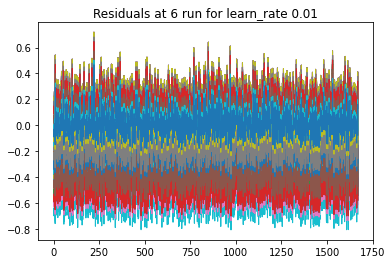

With learn_rate 0.03 -- MSE_train: 0.005, MSE_test: 0.006


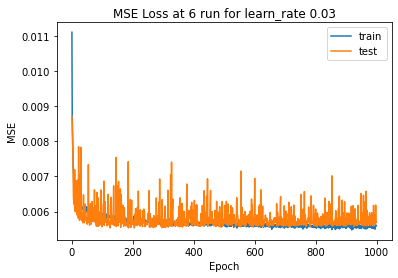

With learn_rate 0.03 -- RMSE: 0.076, R2 score: 0.578


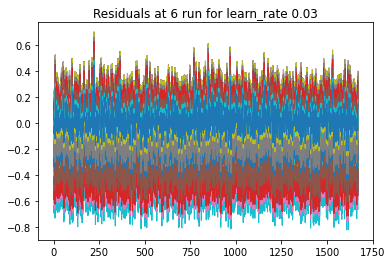

With learn_rate 0.05 -- MSE_train: 0.006, MSE_test: 0.006


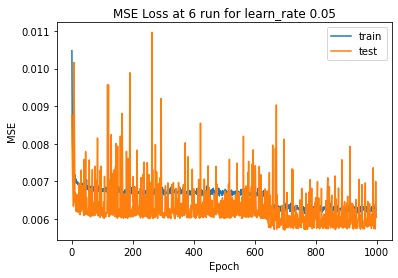

With learn_rate 0.05 -- RMSE: 0.078, R2 score: 0.546


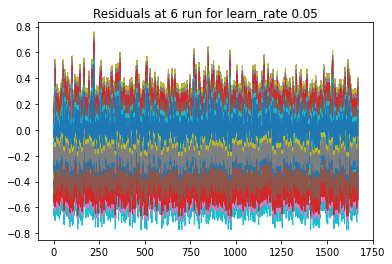

With learn_rate 0.07 -- MSE_train: 0.007, MSE_test: 0.007


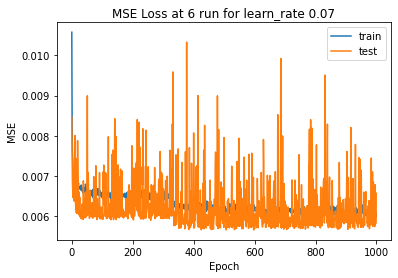

With learn_rate 0.07 -- RMSE: 0.081, R2 score: 0.514


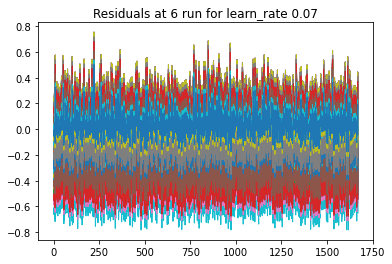

With learn_rate 0.09 -- MSE_train: 0.006, MSE_test: 0.006


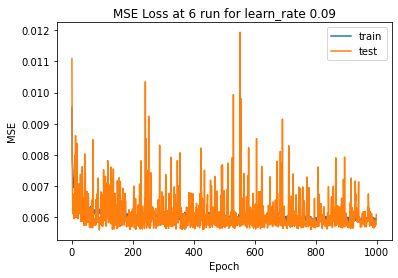

With learn_rate 0.09 -- RMSE: 0.078, R2 score: 0.549


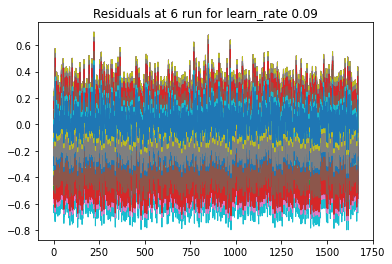

Task 3: Experiment 7 running...

With learn_rate 0.01 -- MSE_train: 0.005, MSE_test: 0.006


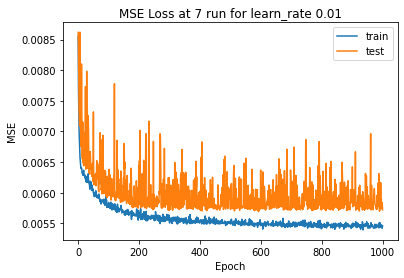

With learn_rate 0.01 -- RMSE: 0.076, R2 score: 0.585


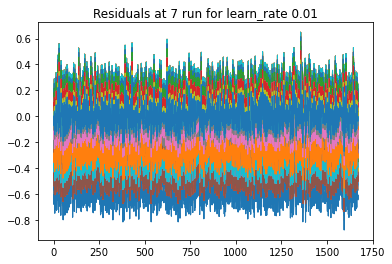

With learn_rate 0.03 -- MSE_train: 0.006, MSE_test: 0.006


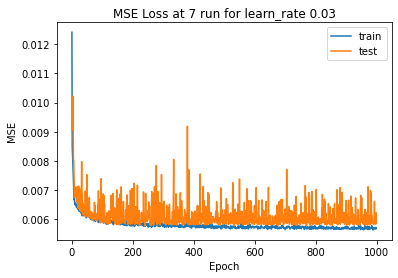

With learn_rate 0.03 -- RMSE: 0.079, R2 score: 0.548


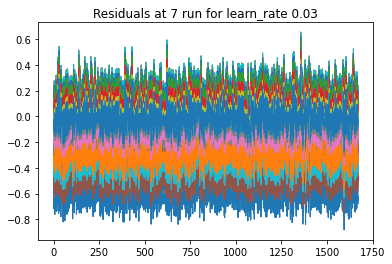

With learn_rate 0.05 -- MSE_train: 0.005, MSE_test: 0.006


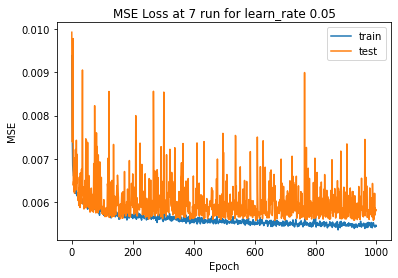

With learn_rate 0.05 -- RMSE: 0.076, R2 score: 0.577


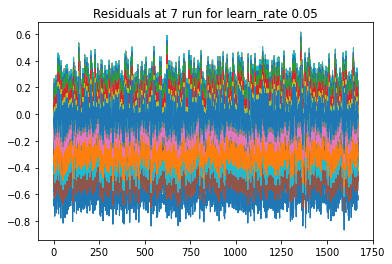

With learn_rate 0.07 -- MSE_train: 0.006, MSE_test: 0.006


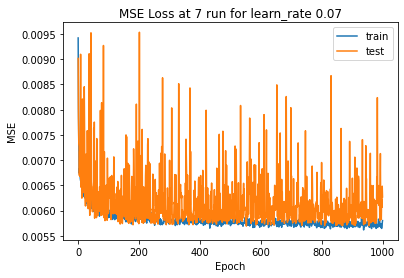

With learn_rate 0.07 -- RMSE: 0.079, R2 score: 0.545


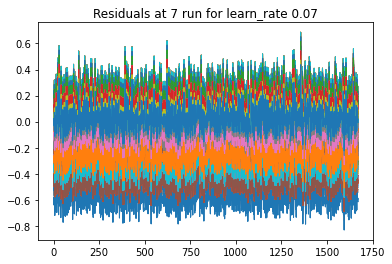

With learn_rate 0.09 -- MSE_train: 0.006, MSE_test: 0.007


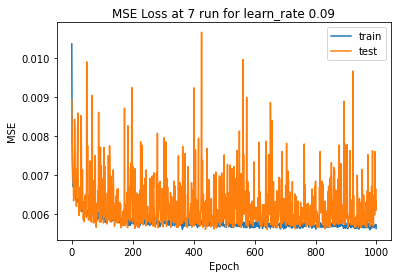

With learn_rate 0.09 -- RMSE: 0.081, R2 score: 0.519


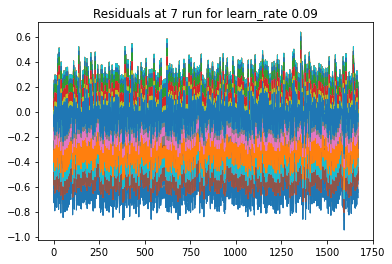

Task 3: Experiment 8 running...

With learn_rate 0.01 -- MSE_train: 0.005, MSE_test: 0.006


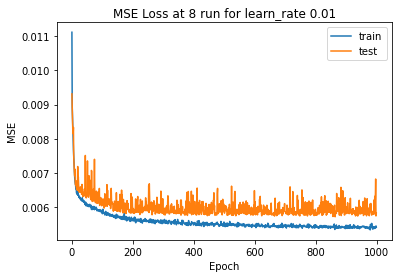

With learn_rate 0.01 -- RMSE: 0.076, R2 score: 0.567


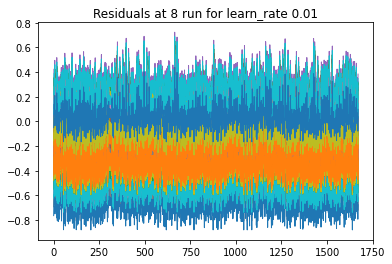

With learn_rate 0.03 -- MSE_train: 0.005, MSE_test: 0.006


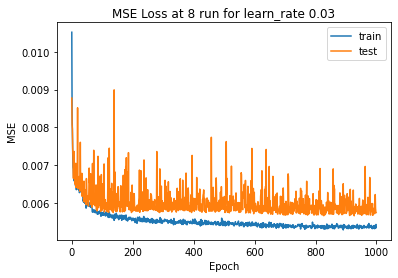

With learn_rate 0.03 -- RMSE: 0.076, R2 score: 0.573


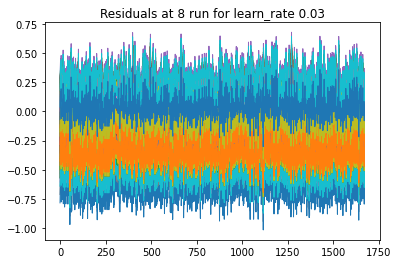

With learn_rate 0.05 -- MSE_train: 0.005, MSE_test: 0.006


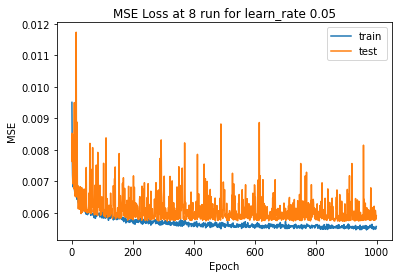

With learn_rate 0.05 -- RMSE: 0.077, R2 score: 0.560


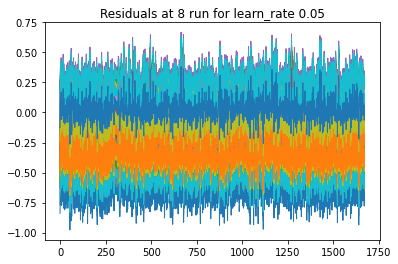

With learn_rate 0.07 -- MSE_train: 0.005, MSE_test: 0.006


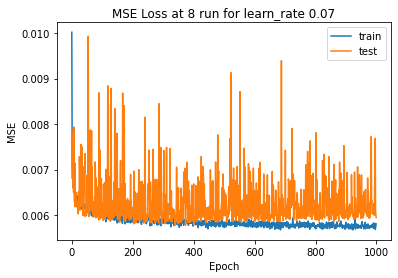

With learn_rate 0.07 -- RMSE: 0.077, R2 score: 0.558


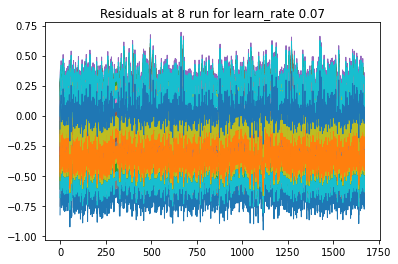

With learn_rate 0.09 -- MSE_train: 0.005, MSE_test: 0.006


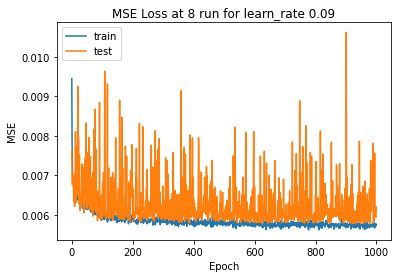

With learn_rate 0.09 -- RMSE: 0.077, R2 score: 0.558


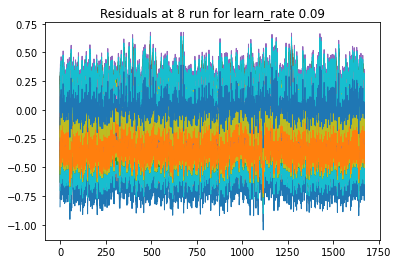

Task 3: Experiment 9 running...

With learn_rate 0.01 -- MSE_train: 0.005, MSE_test: 0.006


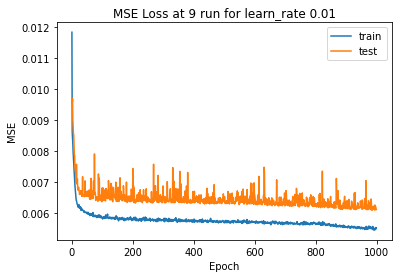

With learn_rate 0.01 -- RMSE: 0.078, R2 score: 0.547


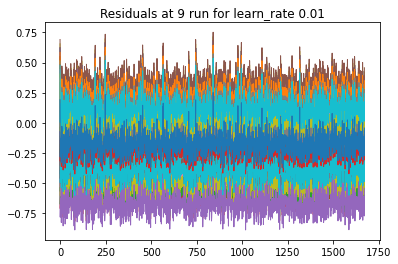

With learn_rate 0.03 -- MSE_train: 0.005, MSE_test: 0.006


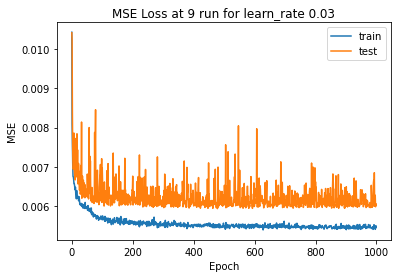

With learn_rate 0.03 -- RMSE: 0.078, R2 score: 0.554


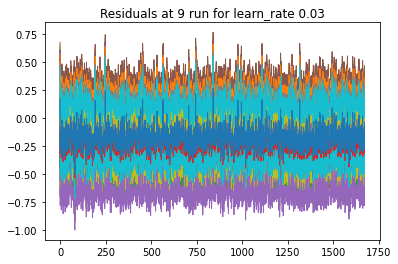

With learn_rate 0.05 -- MSE_train: 0.005, MSE_test: 0.006


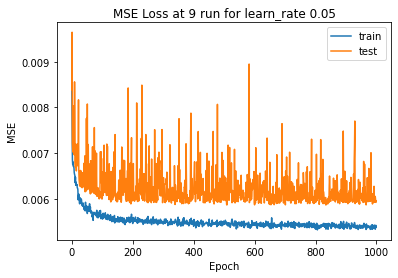

With learn_rate 0.05 -- RMSE: 0.077, R2 score: 0.560


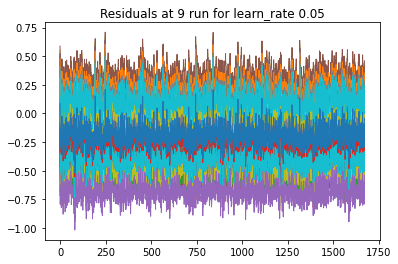

With learn_rate 0.07 -- MSE_train: 0.005, MSE_test: 0.006


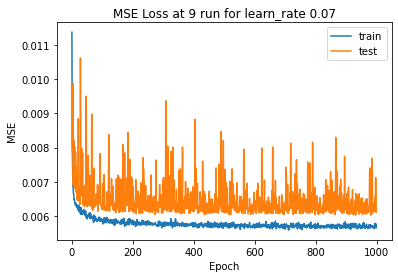

With learn_rate 0.07 -- RMSE: 0.078, R2 score: 0.549


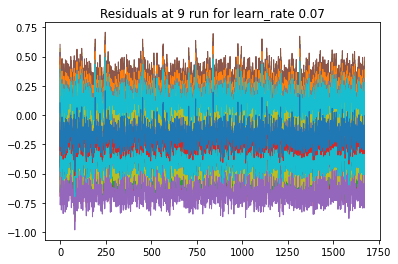

With learn_rate 0.09 -- MSE_train: 0.006, MSE_test: 0.006


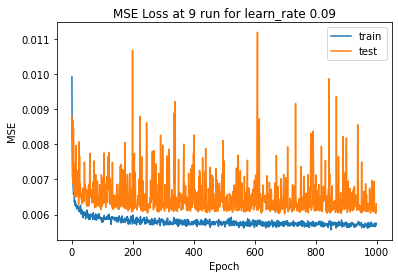

With learn_rate 0.09 -- RMSE: 0.079, R2 score: 0.534


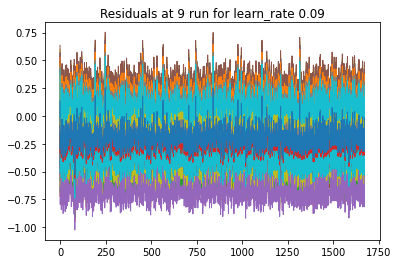

RMSE: 
    lr=0.01  lr=0.03  lr=0.05   lr=0.07  lr=0.09
0      0.0      0.0      0.0  0.078689      0.0
1      0.0      0.0      0.0  0.088715      0.0
2      0.0      0.0      0.0  0.086506      0.0
3      0.0      0.0      0.0  0.080289      0.0
4      0.0      0.0      0.0  0.077511      0.0
5      0.0      0.0      0.0  0.078884      0.0
6      0.0      0.0      0.0  0.078077      0.0
7      0.0      0.0      0.0  0.081385      0.0
8      0.0      0.0      0.0  0.077101      0.0
9      0.0      0.0      0.0  0.079400      0.0

 R2 score: 
    lr=0.01  lr=0.03  lr=0.05   lr=0.07  lr=0.09
0      0.0      0.0      0.0  0.529143      0.0
1      0.0      0.0      0.0  0.400601      0.0
2      0.0      0.0      0.0  0.477839      0.0
3      0.0      0.0      0.0  0.484438      0.0
4      0.0      0.0      0.0  0.522088      0.0
5      0.0      0.0      0.0  0.536168      0.0
6      0.0      0.0      0.0  0.548923      0.0
7      0.0      0.0      0.0  0.519349      0.0
8      0.0      0.

<Figure size 432x288 with 0 Axes>

In [170]:
# Task 3
max_expruns = 10
lr_lst = list(np.arange(0.01, 0.1, 0.02))
num_lr = len(lr_lst)
col_names = ['lr=0.01', 'lr=0.03', 'lr=0.05', 'lr=0.07', 'lr=0.09']
rmse_mx = np.zeros((max_expruns, num_lr))
r2_mx = np.zeros((max_expruns, num_lr))
hidden = 10      # based on result of Task 2, 10 hidden neurons outperformed

for run_num in range(max_expruns):
    print("Task 3: Experiment {} running...\n".format(run_num))

    X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.40, random_state=run_num)

    for learn_rate in lr_lst:
        lr_idx = lr_lst.index(learn_rate)
        
        # Create the Sequential model
        model = Sequential([
            keras.layers.Dense(hidden, input_dim=X_train.shape[1], activation="relu", kernel_initializer='normal'),
            keras.layers.Dense(1, kernel_initializer='normal')
        ])
        # Specify the loss function and the optimizer after a model is created
        sgd = SGD(learning_rate=learn_rate)
        model.compile(loss="mse", optimizer=sgd, metrics=['mse'])
        
        # Fit model
        history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, batch_size=10, verbose=0)
        #history = model.fit(X_train, y_train, validation_split=0.25, epochs=3000, batch_size=10, verbose=0)

        # Evaluate the model
        # https://keras.io/api/models/model_training_apis/
        loss_train, mse_train = model.evaluate(X_train, y_train, verbose=0)
        loss_test, mse_test = model.evaluate(X_test, y_test, verbose=0)
        print('With learn_rate {} -- '.format(learn_rate.round(2)) + 'MSE_train: %.3f, MSE_test: %.3f' % (mse_train, mse_test))

        # plot metrics
        plt.title('Loss at {} run for learn_rate {}'.format(run_num, learn_rate.round(2)))
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.plot(history.history['loss'], label='train')
        plt.plot(history.history['val_loss'], label='test')
        plt.legend()
        plt.savefig('figure/MSE_{}_run_learn_rate_{}.png'.format(run_num, learn_rate.round(2))
        plt.show()
        plt.clf()
        
        #------------------------------------
        plt.title('MSE at {} run for {}'.format(run_num, fname))
        plt.xlabel('Epoch')
        plt.ylabel('MSE')
        plt.plot(history.history['mean_squared_error'], label='train')
        plt.plot(history.history['val_mean_squared_error'], label='test')
        plt.savefig('figure/MSE_{}_run_learn_rate_{}.png'.format(run_num, learn_rate.round(2))
        plt.legend()
        plt.show()

        # Predit
        y_pred = model.predict(X_test)
        rmse = mean_squared_error(y_test, y_pred, squared=False)
        r2 = r2_score(y_test, y_pred)
        print('With learn_rate {} -- '.format(learn_rate.round(2)) + 'RMSE: %.3f, R2 score: %.3f' % (rmse, r2))
        rmse_mx[run_num, hidden_idx] = rmse
        r2_mx[run_num, hidden_idx] = r2

        residuals = y_pred - y_test
        plt.title('Residuals at {} run for learn_rate {}'.format(run_num, learn_rate.round(2)))
        plt.plot(residuals, linewidth=1)
        plt.savefig('figure/res_{}_run_learn_rate_{}.png'.format(run_num, learn_rate.round(2)))
        plt.show()
        plt.clf()
        
rmse_df = pd.DataFrame(rmse_mx, columns=col_names)
rmse_df.to_csv("data/rmse_t3.csv", encoding='utf-8', index=False)
print("RMSE: \n", rmse_df)
#display(rmse_df)

r2_df = pd.DataFrame(r2_mx, columns=col_names)
r2_df.to_csv("data/r2_t3.csv", encoding='utf-8', index=False)
print("\n R2 score: \n", r2_df)
#display(r2_df)

rmse_mean = np.zeros(num_lr)
rmse_std = np.zeros(num_lr)

r2_mean = np.zeros(num_lr)
r2_std = np.zeros(num_lr)

rmse_mean = rmse_mx.mean(axis=1)
rmse_std = rmse_mx.std(axis=1)

r2_mean = r2_mx.mean(axis=1)
r2_std = r2_mx.std(axis=1)

np.savetxt('data/results_t3.txt', (rmse_mean, rmse_std, r2_mean, r2_std), fmt='%1.5f')

print("\n Mean RMSE: ", rmse_mean)
print("\n std of RMSE: ", rmse_std)
print("\n Mean R-squared value: ", r2_mean)
print("\n std of R-squared value: ", r2_std)

In [171]:
pd.read_csv('data/r2_t3.csv')

lr=0.01  lr=0.03  lr=0.05   lr=0.07  lr=0.09
0      0.0      0.0      0.0  0.529143      0.0
1      0.0      0.0      0.0  0.400601      0.0
2      0.0      0.0      0.0  0.477839      0.0
3      0.0      0.0      0.0  0.484438      0.0
4      0.0      0.0      0.0  0.522088      0.0
5      0.0      0.0      0.0  0.536168      0.0
6      0.0      0.0      0.0  0.548923      0.0
7      0.0      0.0      0.0  0.519349      0.0
8      0.0      0.0      0.0  0.558221      0.0
9      0.0      0.0      0.0  0.534108      0.0

In [172]:
pd.read_csv('data/rmse_t3.csv')

lr=0.01  lr=0.03  lr=0.05   lr=0.07  lr=0.09
0      0.0      0.0      0.0  0.078689      0.0
1      0.0      0.0      0.0  0.088715      0.0
2      0.0      0.0      0.0  0.086506      0.0
3      0.0      0.0      0.0  0.080289      0.0
4      0.0      0.0      0.0  0.077511      0.0
5      0.0      0.0      0.0  0.078884      0.0
6      0.0      0.0      0.0  0.078077      0.0
7      0.0      0.0      0.0  0.081385      0.0
8      0.0      0.0      0.0  0.077101      0.0
9      0.0      0.0      0.0  0.079400      0.0

Experiment 0 running...

With 5 neurons -- MSE_train: 0.006, MSE_test: 0.006


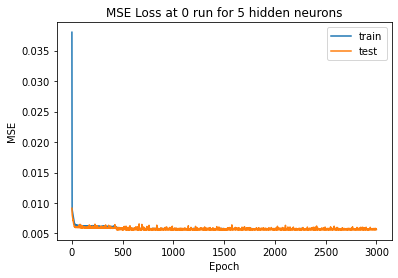

With 5 neurons -- RMSE: 0.079, R2 score: 0.540


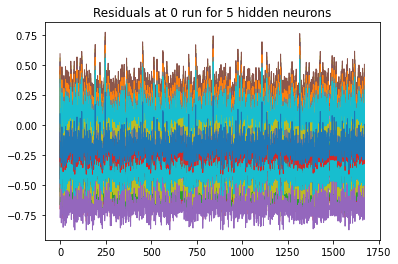

KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

In [181]:
# Task 2
hidden_lst = list(range(5, 25, 5))
num_hidden = len(hidden_lst)
max_expruns = 3
rmse_mx = np.zeros((max_expruns, num_hidden))
r2_mx = np.zeros((max_expruns, num_hidden))

for run_num in range(max_expruns):
    print("Experiment {} running...\n".format(run_num))
    
    for hidden in hidden_lst:
        
        hidden_idx = hidden_lst.index(hidden)

        # Create the Sequential model
        model = Sequential([
            keras.layers.Dense(hidden, input_dim=X_train.shape[1], activation="relu", kernel_initializer='normal'),
            keras.layers.Dense(1, kernel_initializer='normal')
        ])

        # Specify the loss function and the optimizer after a model is created
        #adam = Adam(learning_rate=learn_rate, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
        model.compile(loss="mse", optimizer="adam", metrics=['mse'])     

        # Fit model
        #history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, batch_size=10, verbose=0)
        history = model.fit(X_train, y_train, validation_split=0.25, epochs=3000, batch_size=10, verbose=0)

        # Evaluate the model
        # https://keras.io/api/models/model_training_apis/
        loss_train, mse_train = model.evaluate(X_train, y_train, verbose=0)
        loss_test, mse_test = model.evaluate(X_test, y_test, verbose=0)
        print('With {} neurons -- '.format(hidden) + 'MSE_train: %.3f, MSE_test: %.3f' % (mse_train, mse_test))

        # plot metrics
        plt.title('Loss at {} run for {} hidden neurons'.format(run_num, hidden))
        plt.xlabel('Epoch')
        plt.ylabel('MSE')
        plt.plot(history.history['loss'], label='train')
        plt.plot(history.history['val_loss'], label='test')
        plt.legend()
        plt.savefig('figure/MSE_{}_run_{}_neuron.png'.format(run_num, hidden))
        plt.show()
        plt.clf()
        
        plt.title('MSE at {} run for {} hidden neurons'.format(run_num, hidden))
        plt.ylabel('MSE value')
        plt.xlabel('No. epoch')
        plt.plot(history.history['mean_squared_error'], label='train')
        plt.plot(history.history['val_mean_squared_error'], label='test')
        plt.legend()
        plt.show()

        # Predit
        y_pred = model.predict(X_test)
        rmse = mean_squared_error(y_test, y_pred, squared=False)
        r2 = r2_score(y_test, y_pred)
        print('With {} neurons -- '.format(hidden) + 'RMSE: %.3f, R2 score: %.3f' % (rmse, r2))
        rmse_mx[run_num, hidden_idx] = rmse
        r2_mx[run_num, hidden_idx] = r2

        residuals = y_pred - y_test
        plt.title('Residuals at {} run for {} hidden neurons'.format(run_num, hidden))
        plt.plot(residuals, linewidth=1)
        plt.savefig('figure/res_{}_run_{}_neuron.png'.format(run_num, hidden))
        plt.show()
        plt.clf()
        
col_names = ['5_neuron', '10_neuron', '15_neuron', '20_neuron']

rmse_df = pd.DataFrame(rmse_mx, columns=col_names)
rmse_df.to_csv("data/rmse_t2.csv", encoding='utf-8', index=False)
print("RMSE: \n", rmse_df)
#display(rmse_df)

r2_df = pd.DataFrame(r2_mx, columns=col_names)
r2_df.to_csv("data/r2_t2.csv", encoding='utf-8', index=False)
print("\n R2 score: \n", r2_df)
#display(r2_df)

rmse_mean = np.zeros(num_hidden)
rmse_std = np.zeros(num_hidden)

r2_mean = np.zeros(num_hidden)
r2_std = np.zeros(num_hidden)

rmse_mean = rmse_mx.mean(axis=1)
rmse_std = rmse_mx.std(axis=1)

r2_mean = r2_mx.mean(axis=1)
r2_std = r2_mx.std(axis=1)

np.savetxt('data/results_t2.txt', (rmse_mean, rmse_std, r2_mean, r2_std), fmt='%1.5f')

print("\n Mean RMSE: ", rmse_mean)
print("\n std of RMSE: ", rmse_std)
print("\n Mean R-squared value: ", r2_mean)
print("\n std of R-squared value: ", r2_std)

In [150]:
pd.read_csv('data/rmse_t2.csv')

5_neuron  10_neuron  15_neuron  20_neuron
0  0.079975   0.073807   0.075321   0.077227
1  0.078907   0.074402   0.074428   0.076763
2  0.075996   0.073974   0.075206   0.076037
3  0.075278   0.079800   0.077065   0.078167
4  0.074195   0.073875   0.074961   0.075473
5  0.078829   0.076558   0.077498   0.076631
6  0.074620   0.075881   0.075767   0.080000
7  0.075847   0.076078   0.075767   0.075379
8  0.077960   0.075723   0.075350   0.080019
9  0.074493   0.075023   0.074573   0.078100

In [149]:
pd.read_csv('data/r2_t2.csv')

5_neuron  10_neuron  15_neuron  20_neuron
0  0.493210   0.568368   0.550474   0.527444
1  0.506653   0.561381   0.561068   0.533100
2  0.542379   0.566413   0.551845   0.541886
3  0.550986   0.495421   0.529416   0.515865
4  0.563821   0.567575   0.554768   0.548660
5  0.507630   0.535596   0.524112   0.534703
6  0.558804   0.543767   0.545143   0.492889
7  0.544179   0.541398   0.545133   0.549784
8  0.518429   0.545666   0.550134   0.492656
9  0.560306   0.554028   0.559364   0.516694

In [ ]:
model.compile(loss='mse', optimizer='adam', metrics=['mae'])
print(model.metrics_names)
# ['loss', 'mae']

In [ ]:
# define base model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(13, input_dim=13, init= normal , activation= relu ))
    model.add(Dense(1, init= normal ))
    # compile model
    model.compile(loss="mse", optimizer='adam', metrics=["mae"])
    return model

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# evaluate model with standardized dataset
estimator = KerasRegressor(build_fn=baseline_model, nb_epoch=100, batch_size=5, verbose=0)
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(estimator, X, Y, cv=kfold)
print("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()))

In [ ]:
def build_model():
    model = keras.Sequential([
        keras.layers.Dense(32, activation=tf.nn.relu, input_shape=(X_train.shape[1],)),
        keras.layers.Dense(32, activation=tf.nn.relu),
        keras.layers.Dense(1)
    ])
    
    optimizer = tf.train.RMSPropOptimizer(0.001)
    
    model.compile(loss='mse', optimizer=optimizer, metrics=['mae'])
    
    return model

model = build_model()
model.summary()

In [13]:
import urllib.request as urllib

url = "http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
raw_data = urllib.urlopen(url)
DataMatrix = np.genfromtxt(raw_data, dtype=str, delimiter=',')
DataMatrix

array([['M', '0.455', '0.365', ..., '0.101', '0.15', '15'],
       ['M', '0.35', '0.265', ..., '0.0485', '0.07', '7'],
       ['F', '0.53', '0.42', ..., '0.1415', '0.21', '9'],
       ...,
       ['M', '0.6', '0.475', ..., '0.2875', '0.308', '9'],
       ['F', '0.625', '0.485', ..., '0.261', '0.296', '10'],
       ['M', '0.71', '0.555', ..., '0.3765', '0.495', '12']], dtype='<U6')

In [95]:
# method 1 to read data to df with column names
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data', sep=',', header=None)
df.head()

0      1      2      3       4       5       6      7   8
0  M  0.455  0.365  0.095  0.5140  0.2245  0.1010  0.150  15
1  M  0.350  0.265  0.090  0.2255  0.0995  0.0485  0.070   7
2  F  0.530  0.420  0.135  0.6770  0.2565  0.1415  0.210   9
3  M  0.440  0.365  0.125  0.5160  0.2155  0.1140  0.155  10
4  I  0.330  0.255  0.080  0.2050  0.0895  0.0395  0.055   7

In [96]:
data = df.rename(columns={0:'sex', 1:'length', 2:'diameter', 3:'height', 4:'whole weight', 
                          5:'shucked weight', 6:'viscera weight', 7:'shell weight', 8:'rings'})
data.head()

sex  length  diameter  height  wWhole weight  shucked weight  \
0   M   0.455     0.365   0.095         0.5140          0.2245   
1   M   0.350     0.265   0.090         0.2255          0.0995   
2   F   0.530     0.420   0.135         0.6770          0.2565   
3   M   0.440     0.365   0.125         0.5160          0.2155   
4   I   0.330     0.255   0.080         0.2050          0.0895   

   viscera weight  shell weight  rings  
0          0.1010         0.150     15  
1          0.0485         0.070      7  
2          0.1415         0.210      9  
3          0.1140         0.155     10  
4          0.0395         0.055      7

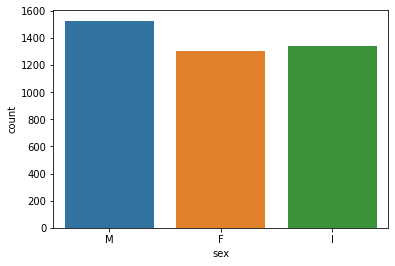

In [91]:
sns.countplot(x='sex', data=data)
plt.show()

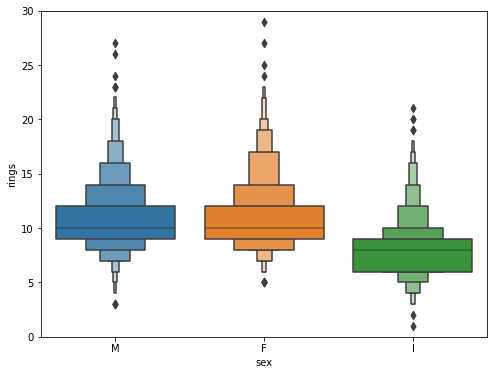

In [92]:
# Categorical features
temp = pd.concat([data['rings'], data['sex']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxenplot(x='sex', y="rings", data=data)
fig.axis(ymin=0, ymax=30);

In [77]:
num_cols = data.select_dtypes('number').columns
num_cols

Index(['length', 'diameter', 'height', 'wWhole weight', 'shucked weight',
       'viscera weight', 'shell weight', 'rings'],
      dtype='object')

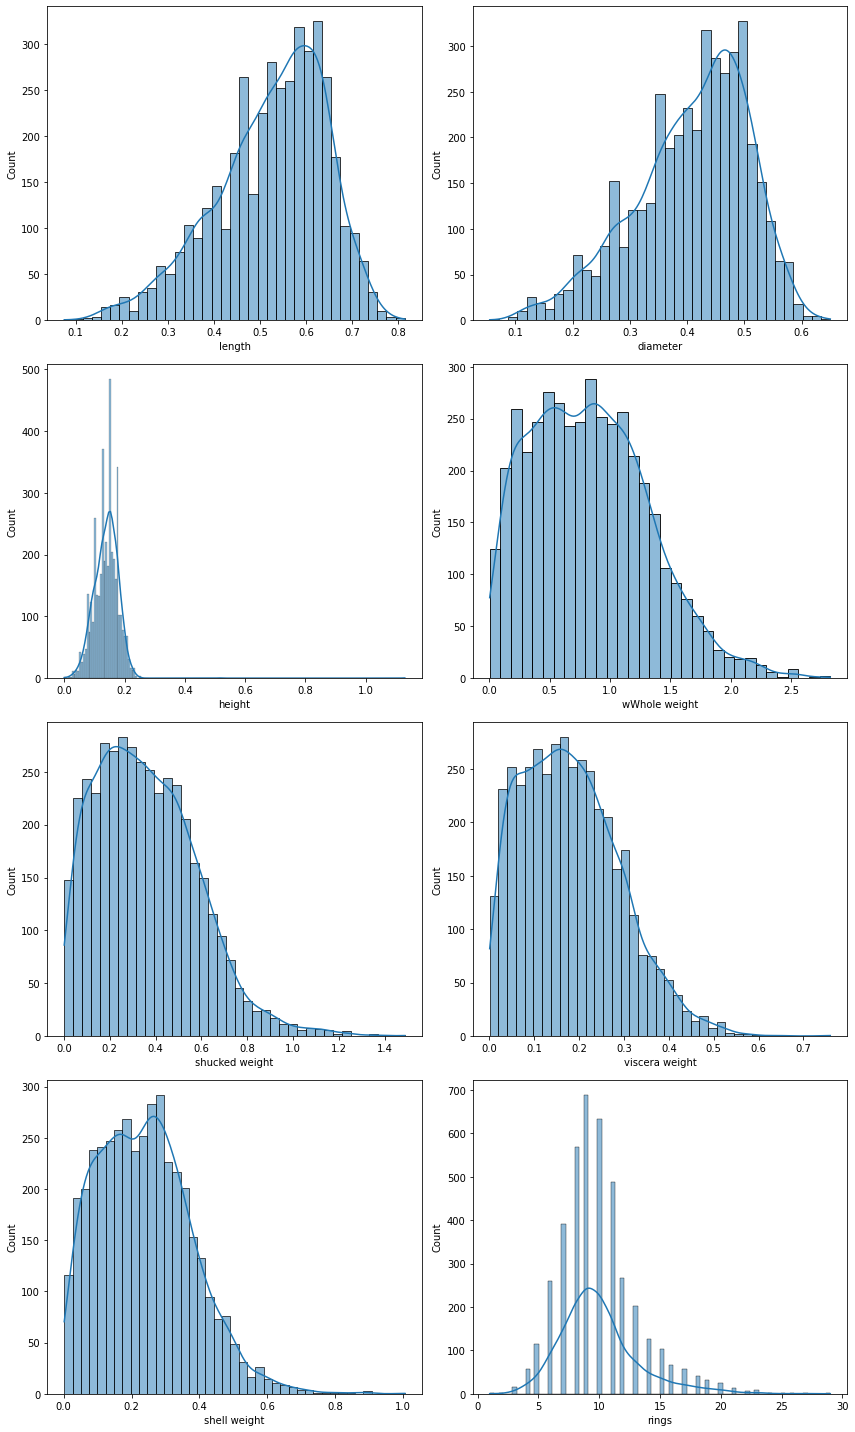

In [78]:
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(12,20))
axs = np.ravel(axs)

for i, col in enumerate(num_cols):
    plt.sca(axs[i])
    sns.histplot(x=col, data=data, kde=True)
    
plt.tight_layout()
plt.show()

In [79]:
# Checking outliers
data.loc[data.height>50]

Empty DataFrame
Columns: [sex, length, diameter, height, wWhole weight, shucked weight, viscera weight, shell weight, rings]
Index: []

In [80]:
data1 = data.loc[~(data.height>50)]
data1.shape

(4177, 9)

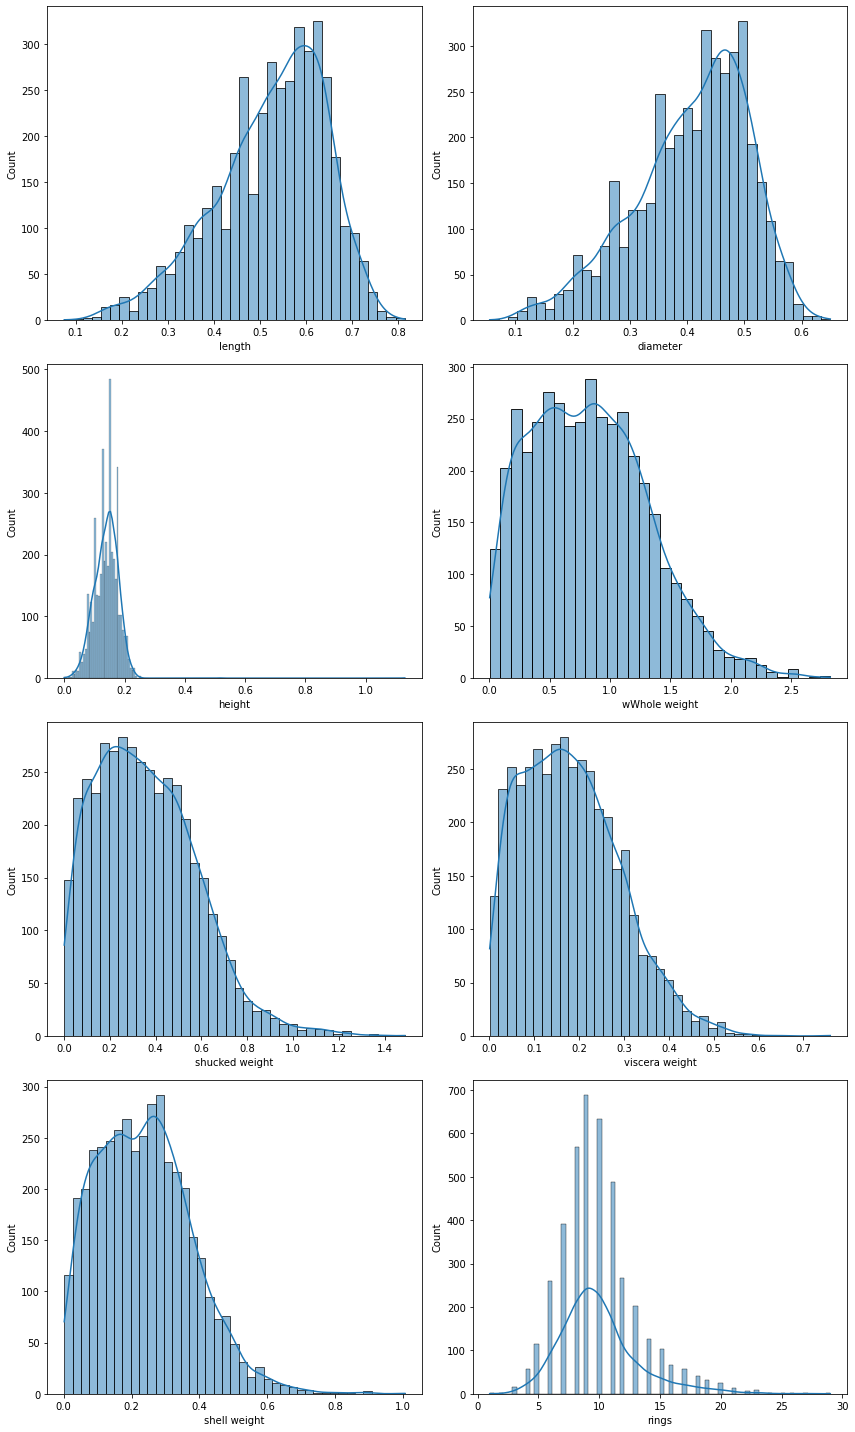

In [81]:
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(12,20))
axs = np.ravel(axs)

for i, col in enumerate(num_cols):
    plt.sca(axs[i])
    sns.histplot(x=col, data=data1, kde=True)
    
plt.tight_layout()
plt.show()

In [97]:
encoder = LabelEncoder()
encoder.fit(data['sex'])
data['sex'] = encoder.transform(data['sex'])

data['age'] = data['rings'] + 1.5
data = data.drop('rings', axis=1)
data.head()

sex  length  diameter  height  wWhole weight  shucked weight  \
0    2   0.455     0.365   0.095         0.5140          0.2245   
1    2   0.350     0.265   0.090         0.2255          0.0995   
2    0   0.530     0.420   0.135         0.6770          0.2565   
3    2   0.440     0.365   0.125         0.5160          0.2155   
4    1   0.330     0.255   0.080         0.2050          0.0895   

   viscera weight  shell weight   age  
0          0.1010         0.150  16.5  
1          0.0485         0.070   8.5  
2          0.1415         0.210  10.5  
3          0.1140         0.155  11.5  
4          0.0395         0.055   8.5

In [98]:
def normalize(df):
    result = df.copy()
    for col_name in df.columns:
        max_value = df[col_name].max()
        min_value = df[col_name].min()
        result[col_name] = (df[col_name] - min_value) / (max_value - min_value)
    return result

dataset = normalize(data)

In [84]:
dataset.to_csv("data/abalone.csv", encoding='utf-8', index=False)

In [99]:
dataset.head()

sex    length  diameter    height  wWhole weight  shucked weight  \
0  1.0  0.513514  0.521008  0.084071       0.181335        0.150303   
1  1.0  0.371622  0.352941  0.079646       0.079157        0.066241   
2  0.0  0.614865  0.613445  0.119469       0.239065        0.171822   
3  1.0  0.493243  0.521008  0.110619       0.182044        0.144250   
4  0.5  0.344595  0.336134  0.070796       0.071897        0.059516   

   viscera weight  shell weight       age  
0        0.132324      0.147982  0.500000  
1        0.063199      0.068261  0.214286  
2        0.185648      0.207773  0.285714  
3        0.149440      0.152965  0.321429  
4        0.051350      0.053313  0.214286

In [100]:
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.40, random_state=42)

In [ ]:
data_X = dataset.values[:, :-1]
data_y = dataset.values[:, -1]

In [16]:
# method 2 to read data to df with column names

column_names = ["sex", "length", "diameter", "height", "whole weight", 
                "shucked weight", "viscera weight", "shell weight", "rings"]

data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data', 
                 sep=',', names=column_names)
data.head()

sex  length  diameter  height  whole weight  shucked weight  viscera weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   shell weight  rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7

In [5]:
data_description = data.describe().transpose()
print(data_description)

                 count      mean       std     min     25%     50%     75%  \
length          4177.0  0.523992  0.120093  0.0750  0.4500  0.5450   0.615   
diameter        4177.0  0.407881  0.099240  0.0550  0.3500  0.4250   0.480   
height          4177.0  0.139516  0.041827  0.0000  0.1150  0.1400   0.165   
wWhole weight   4177.0  0.828742  0.490389  0.0020  0.4415  0.7995   1.153   
shucked weight  4177.0  0.359367  0.221963  0.0010  0.1860  0.3360   0.502   
viscera weight  4177.0  0.180594  0.109614  0.0005  0.0935  0.1710   0.253   
shell weight    4177.0  0.238831  0.139203  0.0015  0.1300  0.2340   0.329   
rings           4177.0  9.933684  3.224169  1.0000  8.0000  9.0000  11.000   

                    max  
length           0.8150  
diameter         0.6500  
height           1.1300  
wWhole weight    2.8255  
shucked weight   1.4880  
viscera weight   0.7600  
shell weight     1.0050  
rings           29.0000  


In [6]:
data_info = data.info()
print(data_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             4177 non-null   object 
 1   length          4177 non-null   float64
 2   diameter        4177 non-null   float64
 3   height          4177 non-null   float64
 4   wWhole weight   4177 non-null   float64
 5   shucked weight  4177 non-null   float64
 6   viscera weight  4177 non-null   float64
 7   shell weight    4177 non-null   float64
 8   rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB
None


In [7]:
data.replace('?', np.nan, inplace=True)
data.isna().sum()

sex               0
length            0
diameter          0
height            0
wWhole weight     0
shucked weight    0
viscera weight    0
shell weight      0
rings             0
dtype: int64

In [10]:
data["sex"] = data["sex"].astype('category')
data["sex"] = data["sex"].cat.codes
data.head()

sex  length  diameter  height  whole weight  shucked weight  \
0    2   0.455     0.365   0.095        0.5140          0.2245   
1    2   0.350     0.265   0.090        0.2255          0.0995   
2    0   0.530     0.420   0.135        0.6770          0.2565   
3    2   0.440     0.365   0.125        0.5160          0.2155   
4    1   0.330     0.255   0.080        0.2050          0.0895   

   viscera weight  shell weight  rings  
0          0.1010         0.150     15  
1          0.0485         0.070      7  
2          0.1415         0.210      9  
3          0.1140         0.155     10  
4          0.0395         0.055      7

In [17]:
# Create instance of labelencoder
labelencoder = LabelEncoder()

# Assigning numerical values and storing in another column
data["sex_cat"] = labelencoder.fit_transform(data["sex"])
data.head()

sex  length  diameter  height  whole weight  shucked weight  viscera weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   shell weight  rings  sex_cat  
0         0.150     15        2  
1         0.070      7        2  
2         0.210      9        0  
3         0.155     10        2  
4         0.055      7        1

In [18]:
data = data[["sex", "sex_cat", "length", "diameter", "height", "whole weight", 
             "shucked weight", "viscera weight", "shell weight", "rings"]]
data.head()

sex  sex_cat  length  diameter  height  whole weight  shucked weight  \
0   M        2   0.455     0.365   0.095        0.5140          0.2245   
1   M        2   0.350     0.265   0.090        0.2255          0.0995   
2   F        0   0.530     0.420   0.135        0.6770          0.2565   
3   M        2   0.440     0.365   0.125        0.5160          0.2155   
4   I        1   0.330     0.255   0.080        0.2050          0.0895   

   viscera weight  shell weight  rings  
0          0.1010         0.150     15  
1          0.0485         0.070      7  
2          0.1415         0.210      9  
3          0.1140         0.155     10  
4          0.0395         0.055      7

In [37]:
abalone = data[list(data.columns.values)[1:]]
abalone.head()

sex_cat  length  diameter  height  whole weight  shucked weight  \
0        2   0.455     0.365   0.095        0.5140          0.2245   
1        2   0.350     0.265   0.090        0.2255          0.0995   
2        0   0.530     0.420   0.135        0.6770          0.2565   
3        2   0.440     0.365   0.125        0.5160          0.2155   
4        1   0.330     0.255   0.080        0.2050          0.0895   

   viscera weight  shell weight  rings  
0          0.1010         0.150     15  
1          0.0485         0.070      7  
2          0.1415         0.210      9  
3          0.1140         0.155     10  
4          0.0395         0.055      7

In [39]:
# Normalization method 1

def normalize(df):
    result = df.copy()
    for col_name in df.columns:
        max_value = df[col_name].max()
        min_value = df[col_name].min()
        result[col_name] = (df[col_name] - min_value) / (max_value - min_value)
    return result

dataset = normalize(abalone)

In [44]:
dataset.to_csv("data/abalone.csv", encoding='utf-8', index=False)

In [40]:
dataset.head()

sex_cat    length  diameter    height  whole weight  shucked weight  \
0      1.0  0.513514  0.521008  0.084071      0.181335        0.150303   
1      1.0  0.371622  0.352941  0.079646      0.079157        0.066241   
2      0.0  0.614865  0.613445  0.119469      0.239065        0.171822   
3      1.0  0.493243  0.521008  0.110619      0.182044        0.144250   
4      0.5  0.344595  0.336134  0.070796      0.071897        0.059516   

   viscera weight  shell weight     rings  
0        0.132324      0.147982  0.500000  
1        0.063199      0.068261  0.214286  
2        0.185648      0.207773  0.285714  
3        0.149440      0.152965  0.321429  
4        0.051350      0.053313  0.214286

In [48]:
data_X = dataset.values[:, :-1]
data_y = dataset.values[:, -1]

In [47]:
data_X

array([[1.        , 0.51351351, 0.5210084 , ..., 0.15030262, 0.1323239 ,
        0.14798206],
       [1.        , 0.37162162, 0.35294118, ..., 0.06624075, 0.06319947,
        0.06826109],
       [0.        , 0.61486486, 0.61344538, ..., 0.17182246, 0.18564845,
        0.2077728 ],
       ...,
       [1.        , 0.70945946, 0.70588235, ..., 0.3527236 , 0.37788018,
        0.30543099],
       [0.        , 0.74324324, 0.72268908, ..., 0.35642233, 0.34298881,
        0.29347285],
       [1.        , 0.85810811, 0.84033613, ..., 0.63517149, 0.49506254,
        0.49177877]])

In [49]:
data_y

array([0.5       , 0.21428571, 0.28571429, ..., 0.28571429, 0.32142857,
       0.39285714])

In [41]:
# Normalization method 2

data_val = abalone.values

X = data_val[:, :-1]
y = data_val[:, -1]

# to scale x and y
X_MinMax = MinMaxScaler()
y_MinMax = MinMaxScaler()

# reshape x and y; X data has 8 attributes
X = np.array(X).reshape((len(X), 8))
y = np.array(y).reshape((len(y), 1))

X_data = X_MinMax.fit_transform(X)
y_data = y_MinMax.fit_transform(y)

In [42]:
X_data[:5,]

array([[1.        , 0.51351351, 0.5210084 , 0.0840708 , 0.18133522,
        0.15030262, 0.1323239 , 0.14798206],
       [1.        , 0.37162162, 0.35294118, 0.07964602, 0.07915707,
        0.06624075, 0.06319947, 0.06826109],
       [0.        , 0.61486486, 0.61344538, 0.11946903, 0.23906499,
        0.17182246, 0.18564845, 0.2077728 ],
       [1.        , 0.49324324, 0.5210084 , 0.11061947, 0.18204356,
        0.14425017, 0.14944042, 0.15296462],
       [0.5       , 0.34459459, 0.33613445, 0.07079646, 0.07189658,
        0.0595158 , 0.05134957, 0.0533134 ]])

In [43]:
y_data[:5]

array([[0.5       ],
       [0.21428571],
       [0.28571429],
       [0.32142857],
       [0.21428571]])

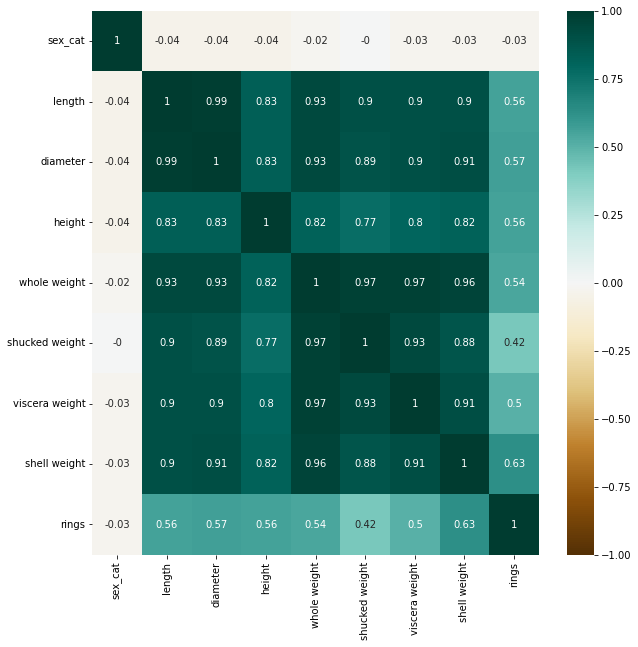

<Figure size 432x288 with 0 Axes>

In [51]:
def corr_plot(df):
    # Develop a correlation map using a heatmap
    corr_matrix = df.corr().round(2)
    plt.figure(figsize=(10,10))
    ax = sns.heatmap(corr_matrix, vmin=-1, center=0, annot=True, cmap='BrBG')
    plt.savefig('figure/corr_mat.png')
    plt.show()
    plt.clf()

corr_plot(dataset)

In [57]:
dataset.head()

sex_cat    length  diameter    height  whole weight  shucked weight  \
0      1.0  0.513514  0.521008  0.084071      0.181335        0.150303   
1      1.0  0.371622  0.352941  0.079646      0.079157        0.066241   
2      0.0  0.614865  0.613445  0.119469      0.239065        0.171822   
3      1.0  0.493243  0.521008  0.110619      0.182044        0.144250   
4      0.5  0.344595  0.336134  0.070796      0.071897        0.059516   

   viscera weight  shell weight     rings  
0        0.132324      0.147982  0.500000  
1        0.063199      0.068261  0.214286  
2        0.185648      0.207773  0.285714  
3        0.149440      0.152965  0.321429  
4        0.051350      0.053313  0.214286

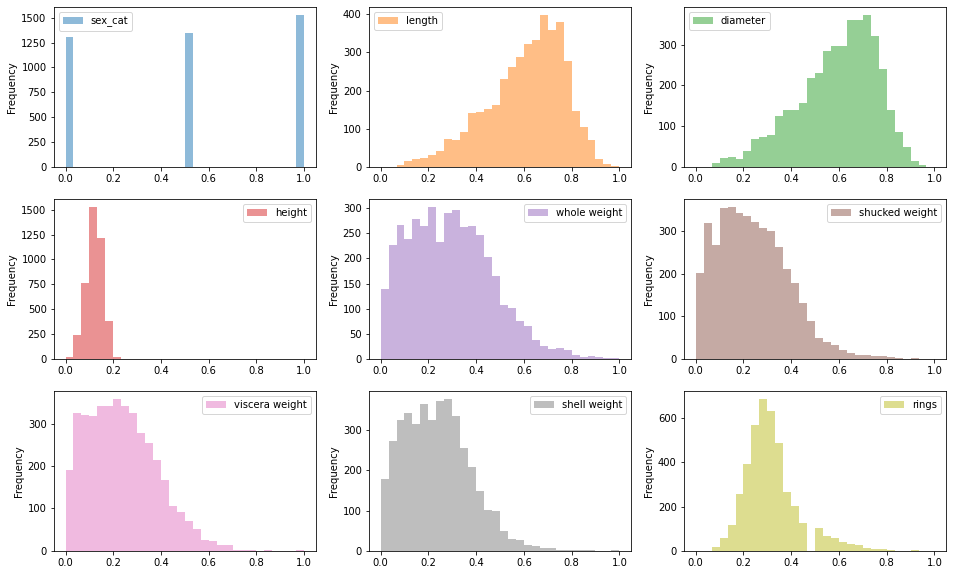

<Figure size 432x288 with 0 Axes>

In [58]:
def hist_plot(df):
    # Create histograms of all features
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16,10))
    df.plot(kind='hist', subplots=True, ax=axes, alpha=0.5, bins=30)
    plt.savefig('figure/hist.png')
    plt.show()
    plt.clf()

hist_plot(dataset)

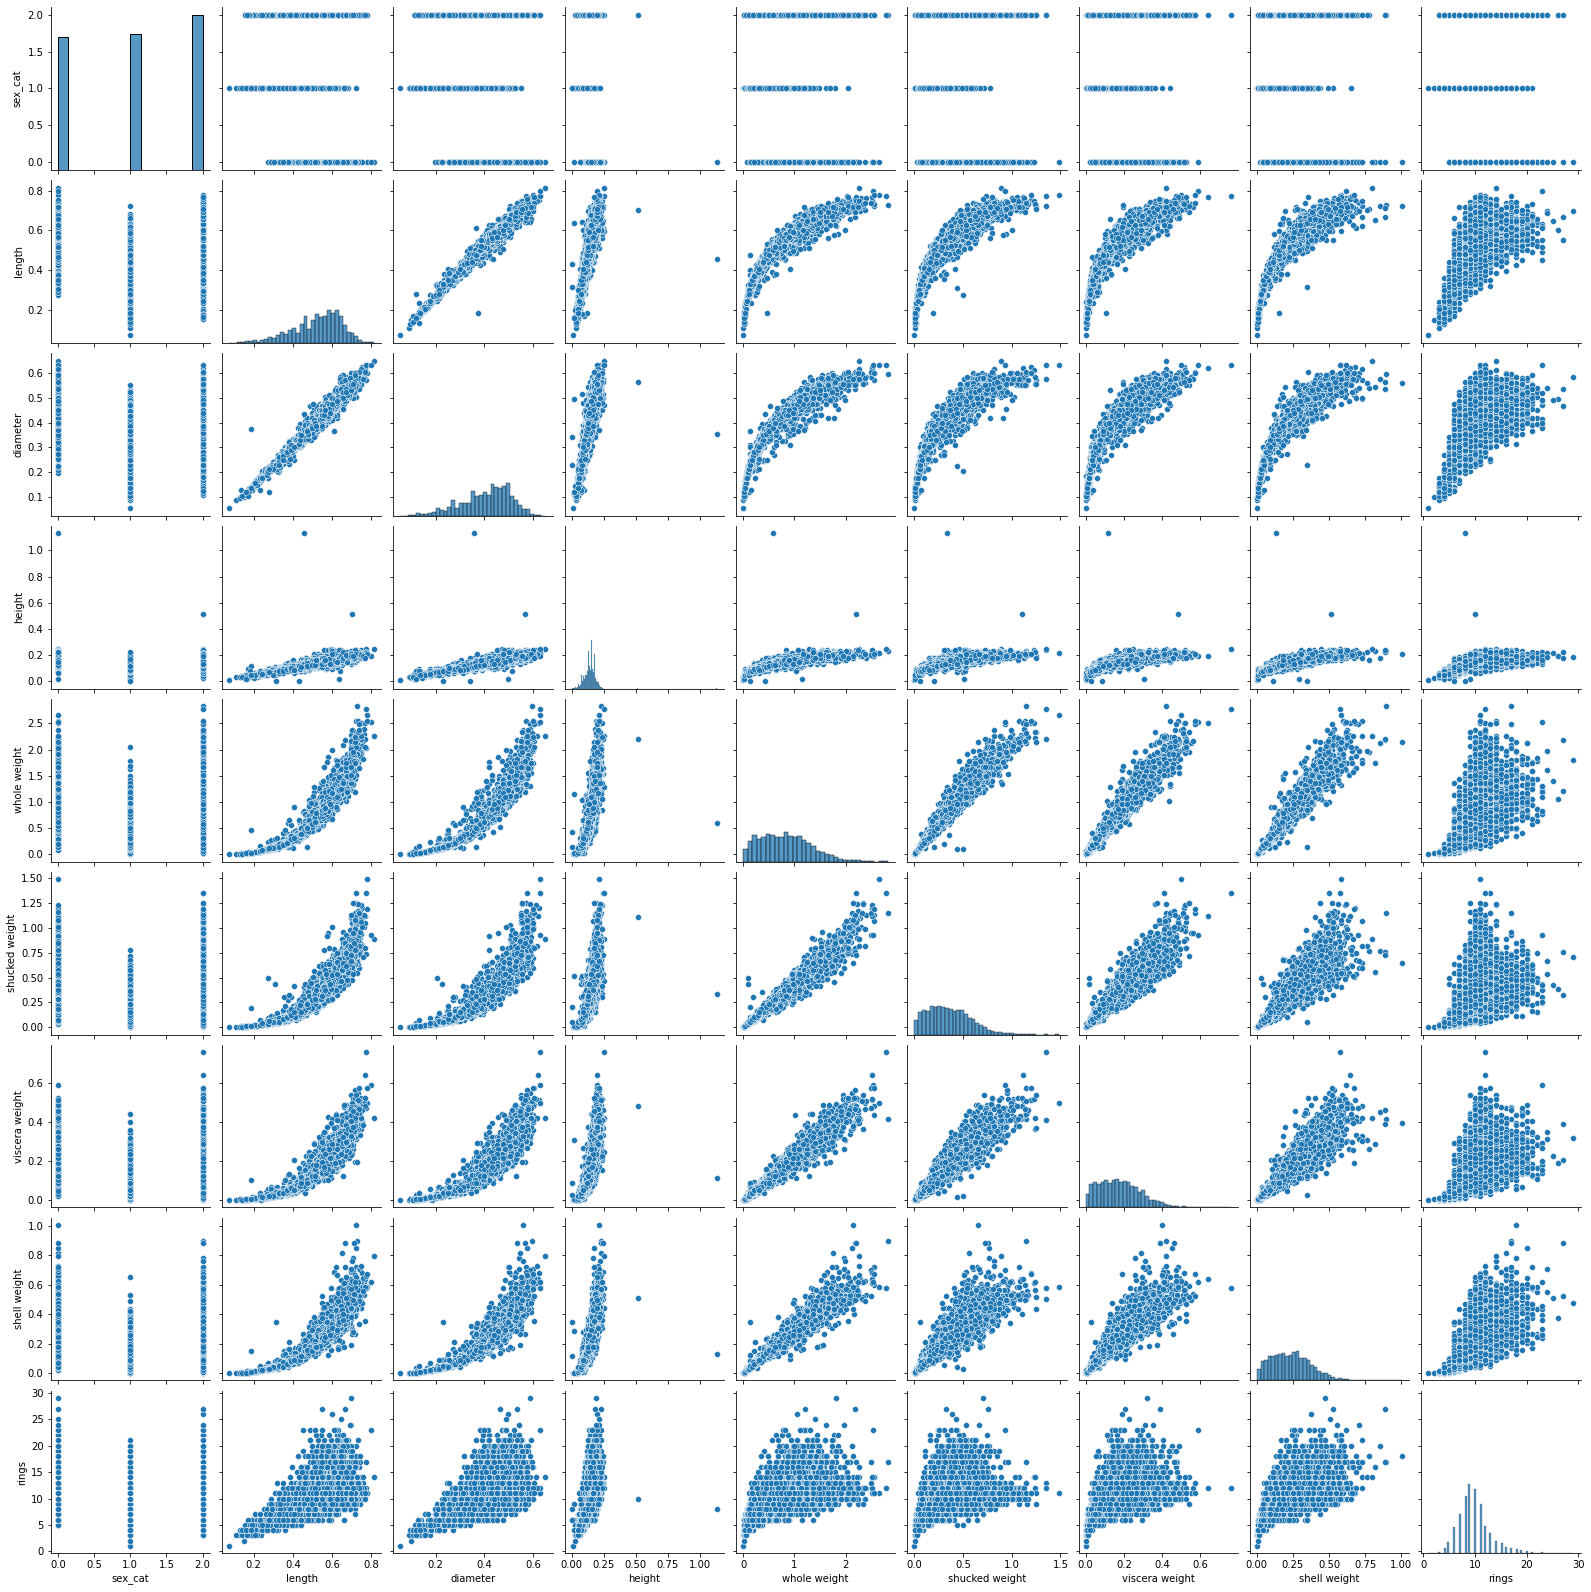

In [66]:
pair_plot = sns.pairplot(abalone)
plt.savefig('figure/pair.png')

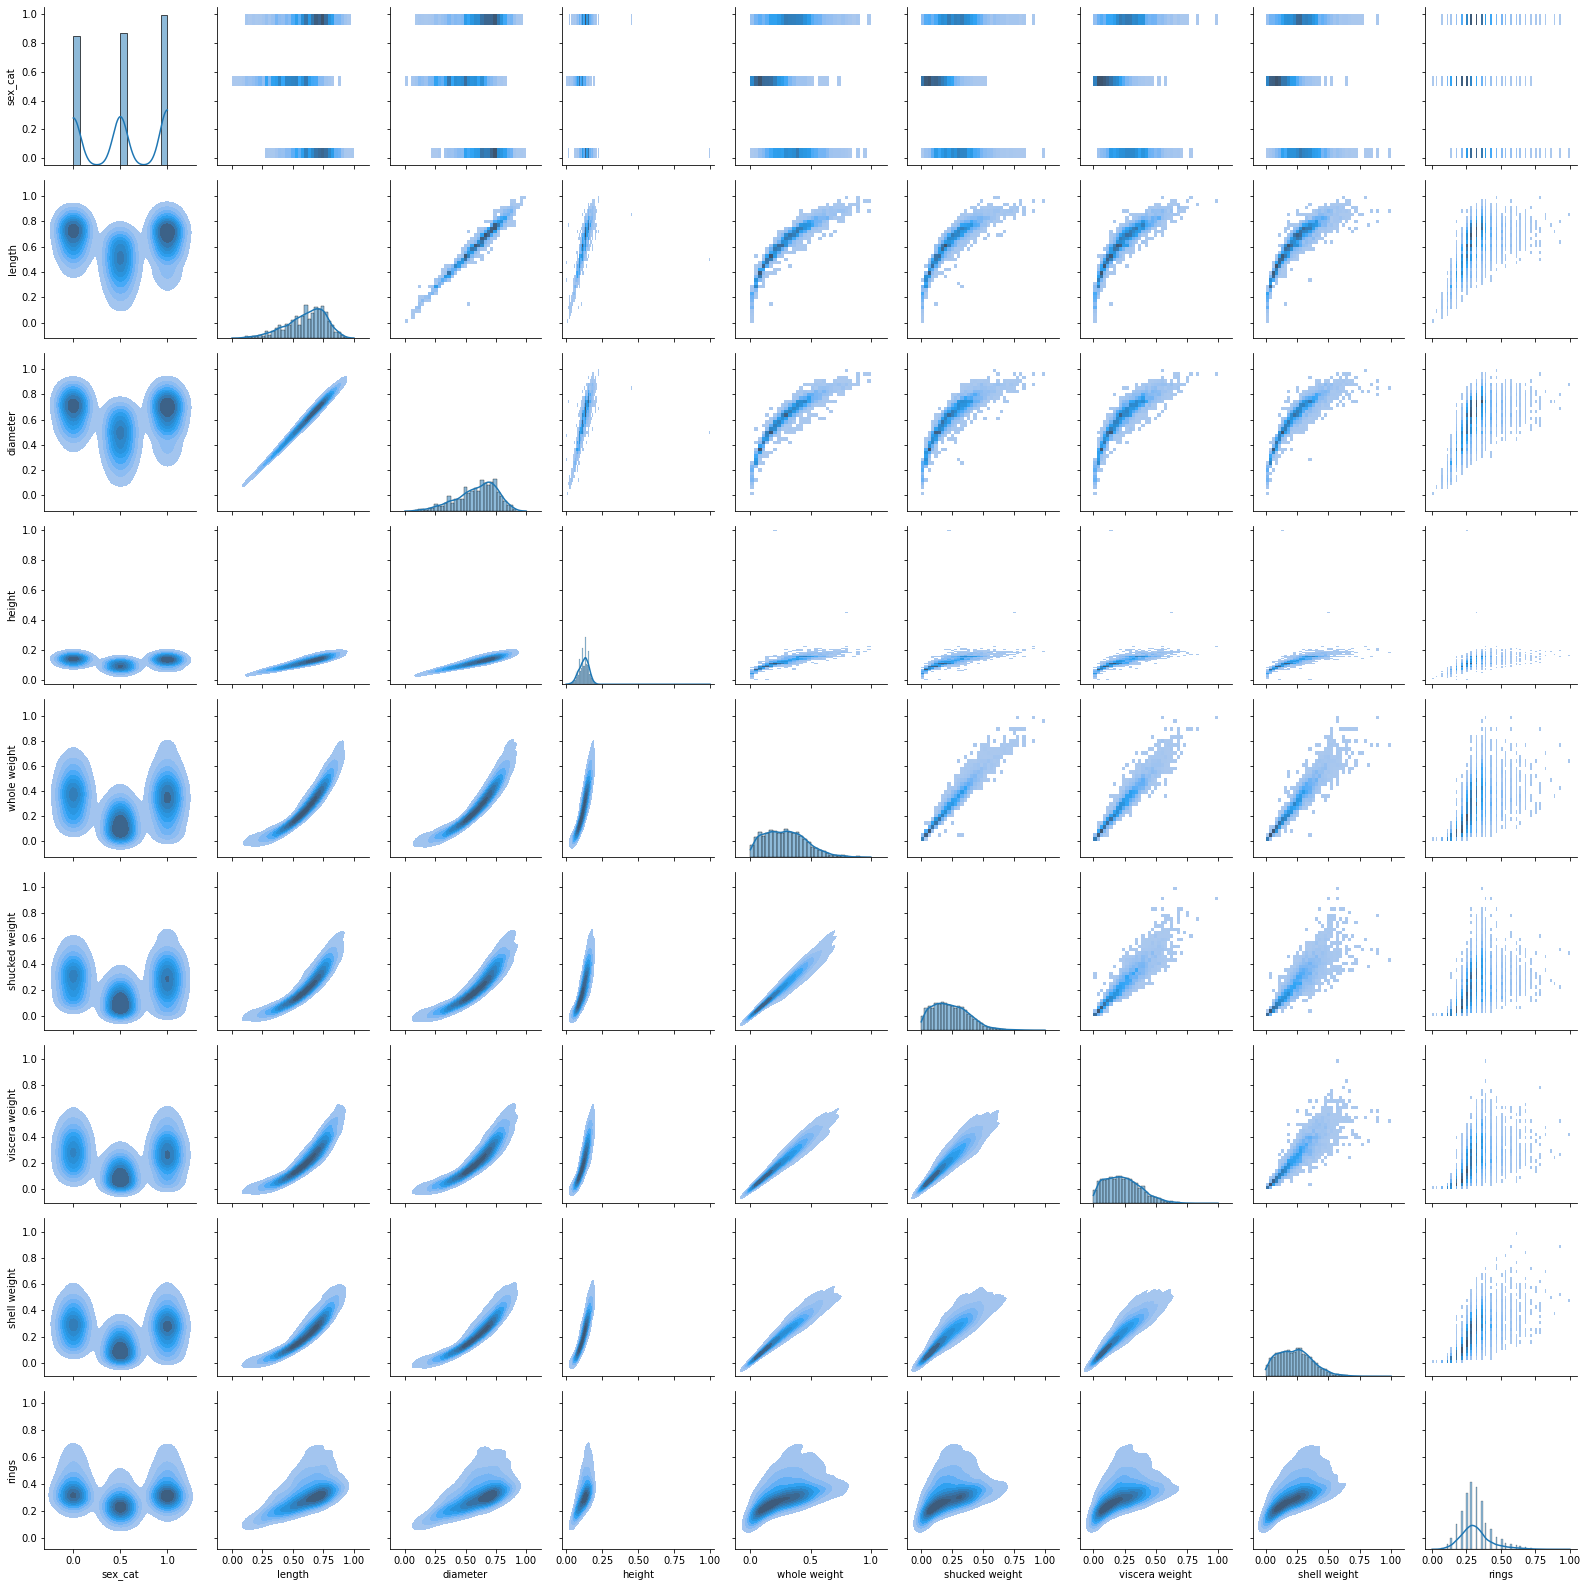

In [69]:
g = sns.PairGrid(dataset)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)
plt.savefig('figure/pairgrid.png')

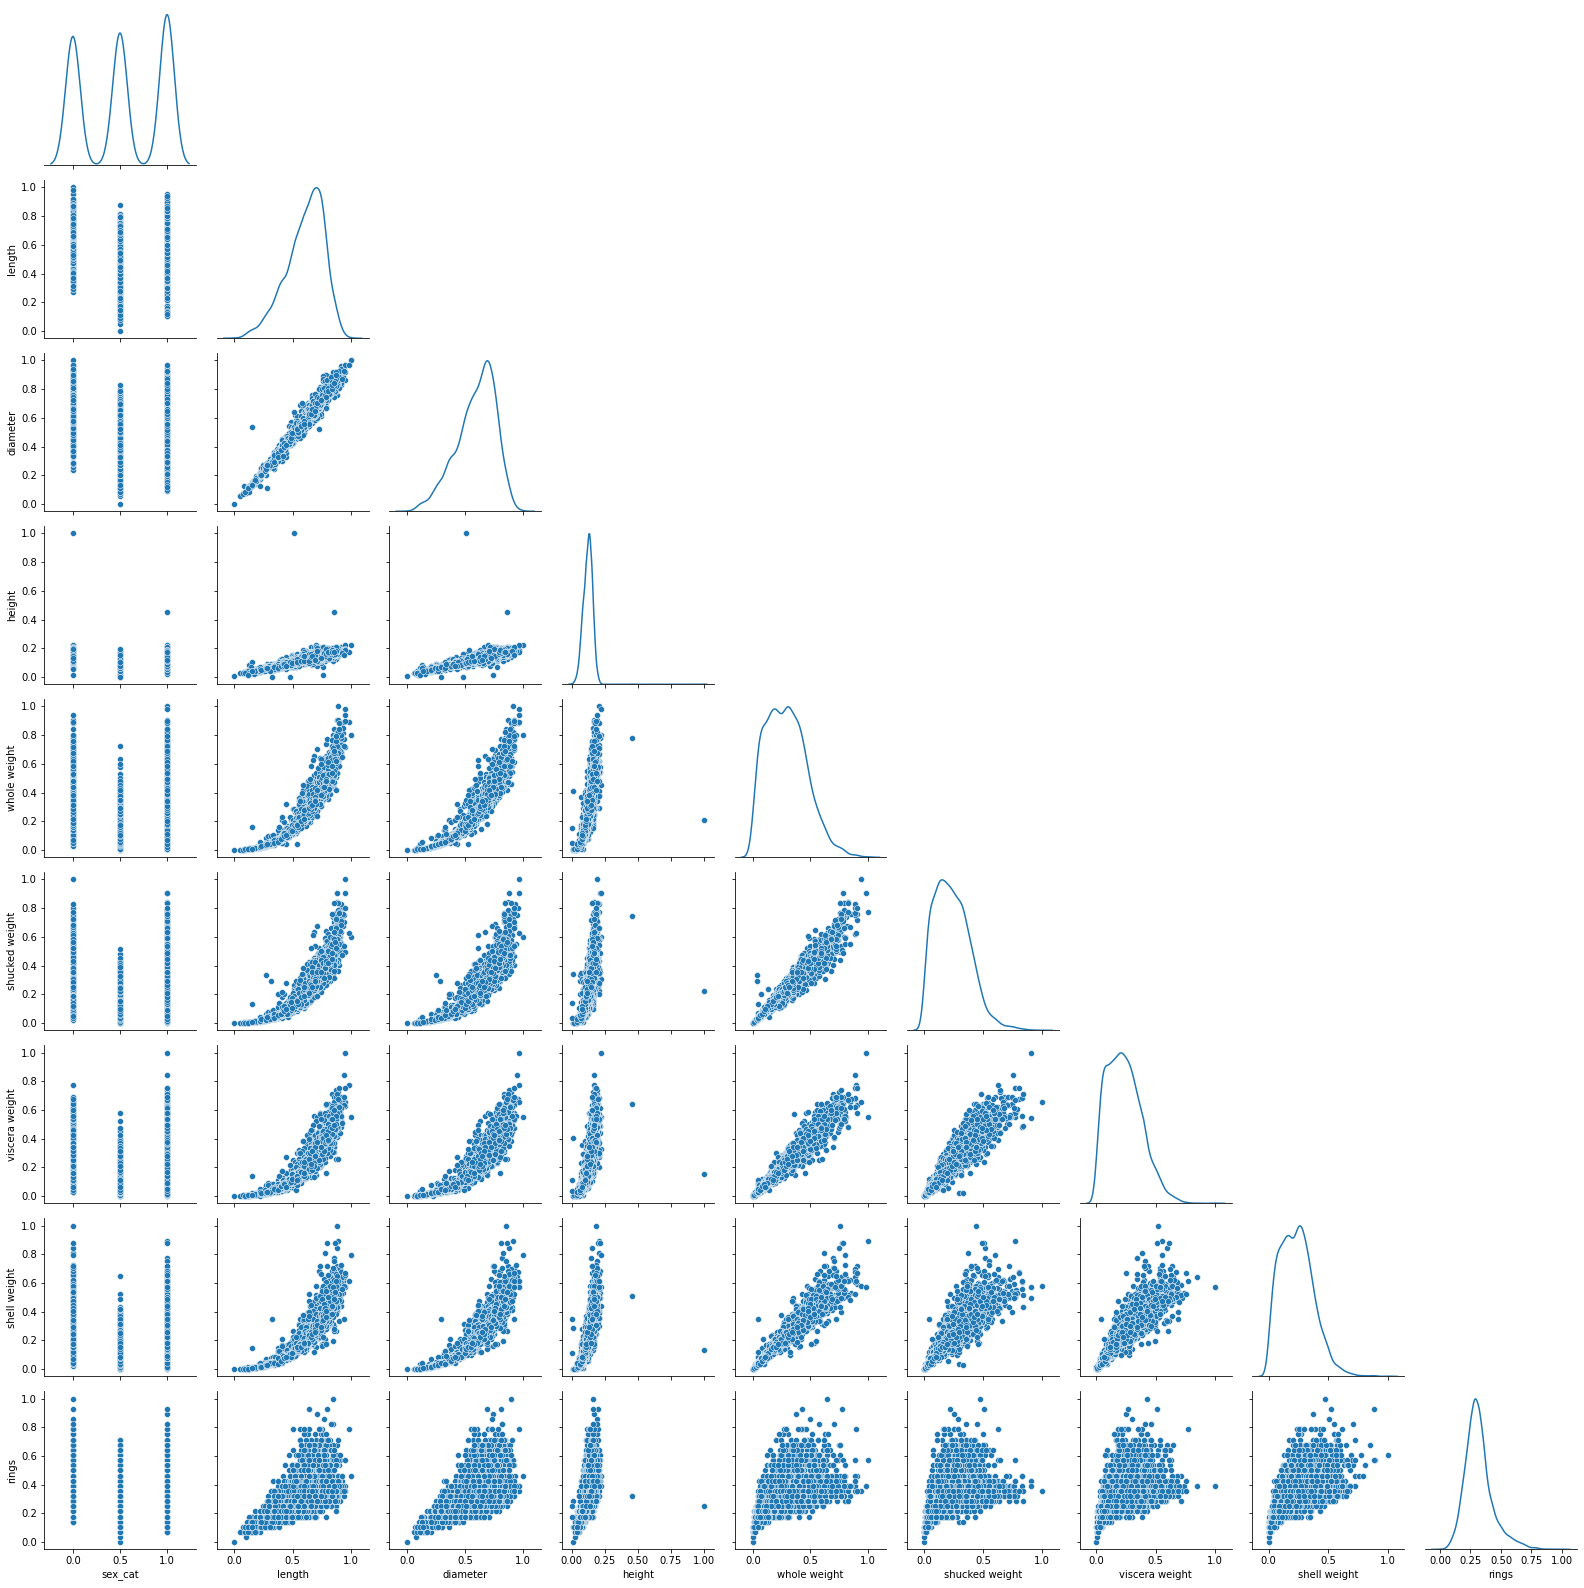

In [70]:
g = sns.PairGrid(dataset, diag_sharey=False, corner=True)
g.map_lower(sns.scatterplot)
g.map_diag(sns.kdeplot)
plt.savefig('figure/pairgrid0.png')